<div style="text-align: center;">
  <h2><strong></strong></h2>
</div>

<center>

## **Comprehensive Technical Test for Data Senior (IA) at Samay**
## **Lung Sound Analysis for Respiratory Health**

### **Autor:** Sebastian Carvalho Salazar  
### **Email:** sebastian.carvalho2596@gmail.com

</center>

# Librerias
---

In [ ]:
# Librerías para manejo de archivos y directorios
import os
import shutil
import zipfile

# Librerías para análisis y manipulación de datos
import pandas as pd
import numpy as np
from datetime import datetime

# Librerías para procesamiento y análisis de texto
import re

# Librerías para estadísticas y muestreo
from scipy.stats import shapiro, norm
from sklearn.utils import resample

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para procesamiento de audio
from scipy.io import wavfile
import librosa
import librosa.display
from scipy.signal import spectrogram
from scipy.stats import entropy

# Librerías para generación de números aleatorios y otros
import random
import requests

# Librerías: Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb

# Librerías: Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Adquisición  de Datos
---

**Explicación del Script:**

Este script contiene tres funciones principales. La primera, download_and_extract_zip, descarga un archivo ZIP desde una URL proporcionada, lo guarda en el disco, lo extrae en una carpeta especificada, y luego elimina el archivo ZIP descargado, manejando errores comunes como fallos de conexión o archivos corruptos. La segunda función, extract_inner_zips, recorre una carpeta dada buscando archivos ZIP internos, los extrae a subdirectorios específicos y elimina los archivos ZIP originales después de la extracción. Finalmente, la función print_txt_files_in_folders recorre una carpeta y sus subcarpetas buscando archivos de texto (.txt), los imprime en consola, y maneja errores durante la lectura de los archivos.

In [ ]:
# Función para descargar y extraer el archivo ZIP principal
def download_and_extract_zip(url, extract_to="extracted_data", date=''):
    zip_filename = f"data_{date}.zip"

    try:
        # Intentar descargar el archivo ZIP
        response = requests.get(url, stream=True, timeout=30)  # Agrega stream y timeout para mayor control

        if response.status_code == 200:
            # Guardar el archivo ZIP en el disco
            with open(zip_filename, "wb") as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)
            print(f"Archivo descargado correctamente: {zip_filename}")
        else:
            raise Exception(f"Error al descargar el archivo. Código de estado: {response.status_code}")

        # Crear el directorio de extracción si no existe
        os.makedirs(extract_to, exist_ok=True)

        # Intentar extraer el archivo ZIP
        with zipfile.ZipFile(zip_filename, "r") as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Archivos extraídos en '{extract_to}'")

    except requests.exceptions.RequestException as e:
        print(f"Error durante la descarga del archivo: {e}")

    except zipfile.BadZipFile:
        print(f"El archivo descargado no es un archivo ZIP válido: {zip_filename}")

    except Exception as e:
        print(f"Se produjo un error inesperado: {e}")

    finally:
        # Eliminar el archivo ZIP temporal si existe
        if os.path.exists(zip_filename):
            os.remove(zip_filename)
            print(f"Archivo temporal eliminado: {zip_filename}")

    return extract_to

# Función para extraer los ZIP internos y eliminar los ZIP originales después de extraer
def extract_inner_zips(folder):
    try:
        for root, _, files in os.walk(folder):
            for file in files:
                if file.endswith(".zip"):
                    zip_path = os.path.join(root, file)
                    extract_to = os.path.join(root, os.path.splitext(file)[0])

                    # Crear el directorio de extracción si no existe
                    os.makedirs(extract_to, exist_ok=True)

                    try:
                        # Intentar extraer el archivo ZIP interno
                        with zipfile.ZipFile(zip_path, "r") as zip_ref:
                            zip_ref.extractall(extract_to)
                        print(f"Extraído: {file} en {extract_to}")

                    except zipfile.BadZipFile:
                        print(f"El archivo ZIP interno no es válido: {zip_path}")

                    except Exception as e:
                        print(f"Error al extraer el archivo ZIP interno '{file}': {e}")

                    finally:
                        # Intentar eliminar el ZIP extraído
                        try:
                            os.remove(zip_path)
                            print(f"Eliminado archivo ZIP: {zip_path}")
                        except Exception as e:
                            print(f"Error al eliminar el archivo ZIP '{zip_path}': {e}")

    except Exception as e:
        print(f"Error al recorrer la carpeta '{folder}': {e}")

    finally:
        print("Proceso de extracción y limpieza de archivos internos completado.")

def print_txt_files_in_folders(base_folder):
    if not os.path.isdir(base_folder):
        print(f"La ruta proporcionada no es válida o no es una carpeta: {base_folder}")
        return

    # Recorrer las subcarpetas dentro de la carpeta base
    for subdir, _, files in os.walk(base_folder):
        txt_files = [file for file in files if file.endswith(".txt")]  # Filtrar archivos .txt
        if txt_files:  # Si existen archivos .txt
            print(f"\n=== Archivos .txt encontrados en la carpeta: {subdir} ===")
            for txt_file in txt_files:
                file_path = os.path.join(subdir, txt_file)
                print(f"\nContenido del archivo: {txt_file}")
                print("-" * 40)
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        print(f.read())  # Imprimir contenido del archivo
                except Exception as e:
                    print(f"Error al leer el archivo {txt_file}: {e}")
                print("-" * 40)

In [ ]:
# Ejecutar las funciones
url = "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/jwyy9np4gv-3.zip"

# Obtener la fecha actual en formato YYYY-MM-DD
current_date = datetime.now().strftime("%Y-%m-%d")
extract_to = f"extracted_data_{current_date}"
extracted_folder = download_and_extract_zip(url, extract_to, current_date)

# Extraer los ZIP internos
extract_inner_zips(extracted_folder)

# Buscar Archivos Readme.txt
print_txt_files_in_folders(extracted_folder)

Archivo descargado correctamente: data_2025-01-27.zip
Archivos extraídos en 'extracted_data_2025-01-27'
Archivo temporal eliminado: data_2025-01-27.zip
Extraído: Stethoscope Files.zip en extracted_data_2025-01-27/Stethoscope Files
Eliminado archivo ZIP: extracted_data_2025-01-27/Stethoscope Files.zip
Extraído: Audio Files.zip en extracted_data_2025-01-27/Audio Files
Eliminado archivo ZIP: extracted_data_2025-01-27/Audio Files.zip
Proceso de extracción y limpieza de archivos internos completado.

=== Archivos .txt encontrados en la carpeta: extracted_data_2025-01-27/Stethoscope Files ===

Contenido del archivo: Readme.txt
----------------------------------------
1. First four recordings from the file P1-P8.zsa were used for testing the stethoscope and should be ignored.
2. The files are named by the included patient recordings and in order. For example P33-P40.zsa contains the recordings from patients P33 to P40 in that order from top to bottom. 
----------------------------------------

# Save Data
---

In [ ]:
# Ruta de la carpeta a comprimir
folder_path = f'/content/extracted_data_{current_date}'

# Ruta del archivo zip resultante
zip_path = f'/content/extracted_data_{current_date}.zip'

# Comprimir la carpeta
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

# Confirmar que el archivo zip se ha creado
zip_path

'/content/extracted_data_2025-01-27.zip'

# Limpieza de Datos
---

**Explicación del Script:**

Este script define un diccionario de mapeo de abreviaturas a términos completos, como "P" a "Posterior" y "L" a "Lower" o "Left" dependiendo de su posición en una cadena. La función map_string toma un valor de entrada (una cadena de texto), lo divide en partes por espacios y luego mapea cada parte según el diccionario. Si encuentra la letra "L" en una posición específica, la mapea a "Left" o "Lower" según corresponda, y para otras letras, aplica su valor correspondiente del diccionario. Si una parte no está en el diccionario, la deja sin cambios. Finalmente, la función devuelve la cadena modificada con los términos mapeados.

In [ ]:
# Definir el diccionario de mapeo
mapping = {
    "P": "Posterior",
    "L": ["Lower", "Left"],  # L puede ser Lower o Left dependiendo de la posición
    "R": "Right",
    "U": "Upper",
    "A": "Anterior",
    "M": "Middle",
    "I": "Inspiratory",
    "E": "Expiratory",
    "W": "Wheezes",
    "C": "Crackles",
    "N": "Normal",
    "Crep": "crepitations"
}

# Función para aplicar el mapeo
def map_string(value):
    # Dividir el string por espacios para separar las letras
    parts = value.split()

    mapped_parts = []

    for i, part in enumerate(parts):
        if part.upper() == "L":
            if i == 1:  # Si "L" está al principio, lo mapeamos como Left
                mapped_parts.append(mapping["L"][1])  # "Left"
            else:  # Si "L" está en otras posiciones, lo mapeamos como Lower
                mapped_parts.append(mapping["L"][0])  # "Lower"
        elif part in mapping:
            mapped_parts.append(mapping[part])
        else:
            mapped_parts.append(part)  # Si no está en el diccionario, dejamos la parte como está

    return " ".join(mapped_parts)

**Explicación del Script:**

Este script realiza un procesamiento de datos sobre un archivo Excel. Primero, lee el archivo ubicado en una ruta específica y extrae la última columna de datos, mostrando su contenido en consola. Luego, elimina las columnas que contienen más del 90% de datos nulos, e imprime las columnas eliminadas. Posteriormente, elimina las filas con valores nulos y asigna un identificador único a cada fila. En un paso de preprocesamiento adicional, reemplaza los valores nulos en la columna 'Diagnosis' por "sin diagnóstico", cambia las ocurrencias de "n" a "normal" y convierte todo el texto a minúsculas. Finalmente, aplica una función de mapeo (map_string) a las columnas 'Location' y 'Sound type' para transformar ciertos términos en su equivalente completo, según un diccionario predefinido.

In [ ]:
# Leer el archivo Excel
path = f'/content/extracted_data_{current_date}/Data annotation.xlsx'
df = pd.read_excel(path)

# Extraer la última columna
last_column_name = df.columns[-1]
last_column_text = df[last_column_name].dropna()

# Imprimir información llamativa del texto en la última columna
print("="*40)
print(f"Contenido de la última columna: ", "\n")
print(last_column_name)
for idx, text in enumerate(last_column_text, start=0):
    print(f"{idx}. {text}")
print("="*40)

# Identificar y eliminar columnas con más del 90% de datos nulos
threshold = 0.90
columns_to_drop = df.columns[df.isnull().mean() > threshold]
df_cleaned = df.drop(columns=columns_to_drop)

# Mostrar las columnas eliminadas
print(f"\nColumnas eliminadas (más del {threshold*100}% de datos nulos):")
print(columns_to_drop.tolist())
print("="*40, "\n")

# Eliminar datos nulos
df_cleaned = df_cleaned.dropna()

# Asignar id
df_cleaned['id'] = df_cleaned.index + 1

# Preprocesar los datos: llenar valores nulos y limpiar texto, reemplazar las "n" por "normal", y llevar todo a minúsculas
df_cleaned['Diagnosis'] = df_cleaned['Diagnosis'].fillna("sin diagnóstico")
df_cleaned['Diagnosis'] = df_cleaned['Diagnosis'].apply(lambda word: re.sub(r'\bN\b', 'normal', word.strip(), flags=re.IGNORECASE))
df_cleaned['Diagnosis'] = df_cleaned['Diagnosis'].apply(lambda words: words.lower())

# Aplicar la función a la columna
df_cleaned['Location'] = df_cleaned['Location'].apply(map_string)
df_cleaned['Sound type'] = df_cleaned['Sound type'].apply(map_string)

Contenido de la última columna:  

Posterior: P Lower: L Left: L Right R, UPPER: U, ANTERIOR: A, MIDDLE: M
0. Insipratory: I, Experiatory: E, Wheezes: W, Crackles: C , N:Normal
1. Crep:crepitations

Columnas eliminadas (más del 90.0% de datos nulos):
['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Posterior: P Lower: L Left: L Right R, UPPER: U, ANTERIOR: A, MIDDLE: M']



In [ ]:
df_cleaned.head(5)

,Age,Gender,Location,Sound type,Diagnosis,id
0,70.0,M,Posterior Left Lower,Inspiratory Expiratory Wheezes,asthma,1
1,52.0,F,Posterior Left Lower,Expiratory Wheezes,asthma,2
2,50.0,F,Posterior Left Lower,Inspiratory Expiratory Wheezes,asthma,3
3,72.0,F,Posterior Right Lower,Inspiratory Crackles,heart failure + lung fibrosis,4
4,71.0,M,Posterior Right Lower,Inspiratory Crackles Expiratory Wheezes,heart failure + copd,5


# Resumen Estadístico
---

**Explicación del Script:**

Este script define una función llamada plot_counts, que recibe un DataFrame y el nombre de una columna para contar las ocurrencias de cada valor único en esa columna. La función agrupa los datos por la columna seleccionada y genera un gráfico de barras utilizando Seaborn y Matplotlib. El gráfico muestra el conteo de cada valor, con barras coloreadas, etiquetas en las barras que indican la cantidad, y un formato visual atractivo (con etiquetas legibles, título, y etiquetas del eje X y Y ajustadas). Luego, imprime los resultados de los conteos en consola y devuelve los conteos en forma de una Serie. Finalmente, el script aplica esta función a tres columnas del DataFrame: 'Diagnosis', 'Location' y 'Sound type', generando gráficos para cada una.

## Análisis de Frecuencia de Diagnósticos, Ubicación y Tipo de Sonido

### 1. **Distribución de Diagnósticos:**
Los datos muestran la distribución de los diagnósticos en el conjunto de pacientes, destacando que el **diagnóstico "normal"** es el más común con **35 casos**, seguido de cerca por **asma (32 casos)**. Sin embargo, los diagnósticos más graves como **insuficiencia cardíaca (18 casos)**, **EPOC (9 casos)**, y **neumonía (5 casos)** tienen una frecuencia considerablemente más baja. También se observa que hay diagnósticos menos comunes relacionados con comorbilidades, como **insuficiencia cardíaca + EPOC (2 casos)** y **efusión pleural (2 casos)**. Los diagnósticos con combinaciones de enfermedades, como **asma y fibrosis pulmonar** y **insuficiencia cardíaca + fibrosis pulmonar**, son los menos frecuentes, con **1 caso** cada uno.

### 2. **Distribución de Ubicación de los Sonidos:**
En cuanto a la **ubicación de las grabaciones de los sonidos pulmonares**, la mayoría de las grabaciones provienen de las zonas posteriores, especialmente de las áreas **derecha inferior (24 casos)** y **izquierda inferior (19 casos)**. Las ubicaciones **posterior media y superior derecha** también presentan una cantidad considerable de grabaciones, con 16 y 14 casos respectivamente. Por otro lado, las grabaciones en las zonas anteriores (como **anterior derecha superior** y **anterior izquierda superior**) tienen una frecuencia mucho menor, con solo entre 2 y 6 casos en cada una de ellas.

### 3. **Distribución del Tipo de Sonido:**
En cuanto a los **tipos de sonido**, el tipo más común es **sibilancias espiratorias (39 casos)**, lo que es consistente con diagnósticos respiratorios como **asma**. Los sonidos **normales** también son bastante frecuentes, con **35 casos**, lo que refleja la presencia de pacientes saludables en el conjunto de datos. Otros tipos de sonidos, como las **crepitaciones (23 casos)**, son comunes en pacientes con enfermedades respiratorias como **fibrosis pulmonar**. Los **crackles** y los sonidos más complejos, como **sibilancias inspiratorias y espiratorias combinadas** o **crackles inspiratorios**, son menos frecuentes, con solo unos pocos casos reportados.

## **Conclusiones:**
- El conjunto de datos muestra una mayor representación de diagnósticos comunes, como **asma y normales**, mientras que las enfermedades respiratorias graves están menos representadas.
- La ubicación de las grabaciones se distribuye principalmente en las áreas posteriores del pecho, lo que podría reflejar una mayor accesibilidad o relevancia clínica en esas zonas para la detección de sonidos pulmonares.
- En cuanto a los tipos de sonido, las **sibilancias espiratorias** y las **crepitaciones** son los sonidos más frecuentes, lo que es coherente con enfermedades respiratorias obstructivas y restrictivas. Los sonidos normales también están presentes en el conjunto de datos, lo que permite un análisis comparativo de la variabilidad entre pacientes saludables y aquellos con afecciones respiratorias.


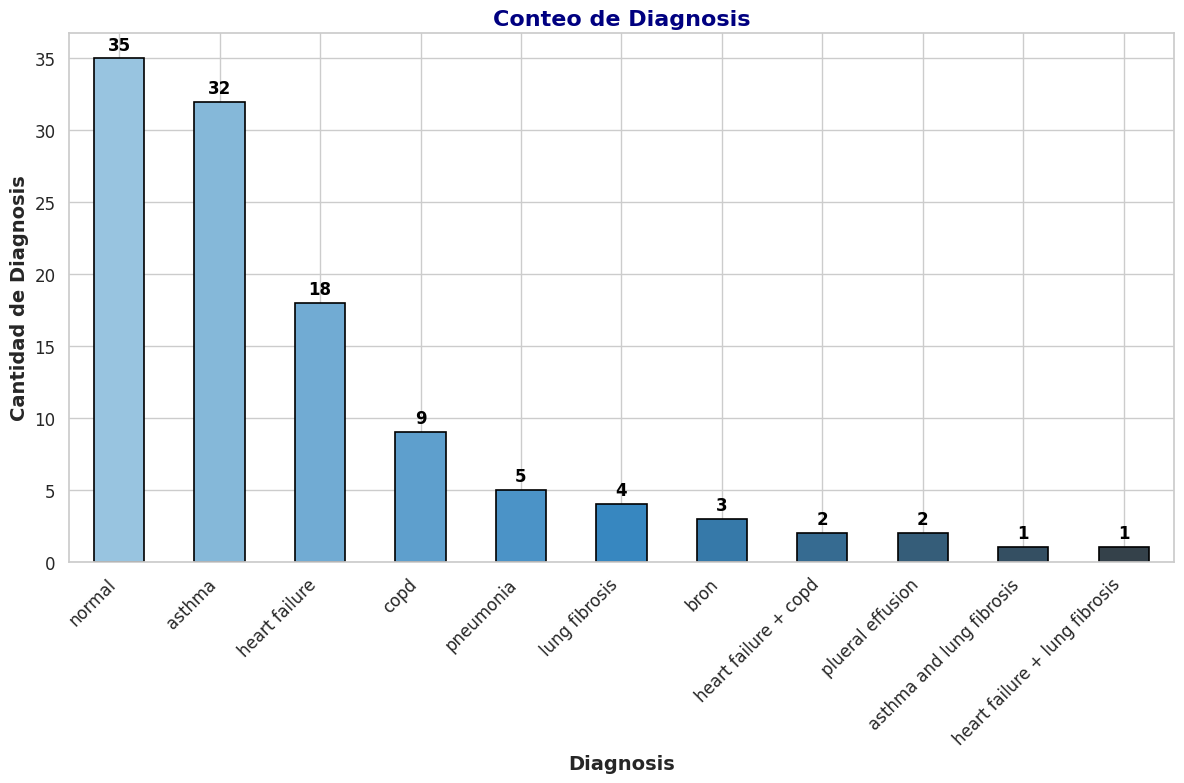

Diagnosis
normal                           35
asthma                           32
heart failure                    18
copd                              9
pneumonia                         5
lung fibrosis                     4
bron                              3
heart failure + copd              2
plueral effusion                  2
asthma and lung fibrosis          1
heart failure + lung fibrosis     1
dtype: int64


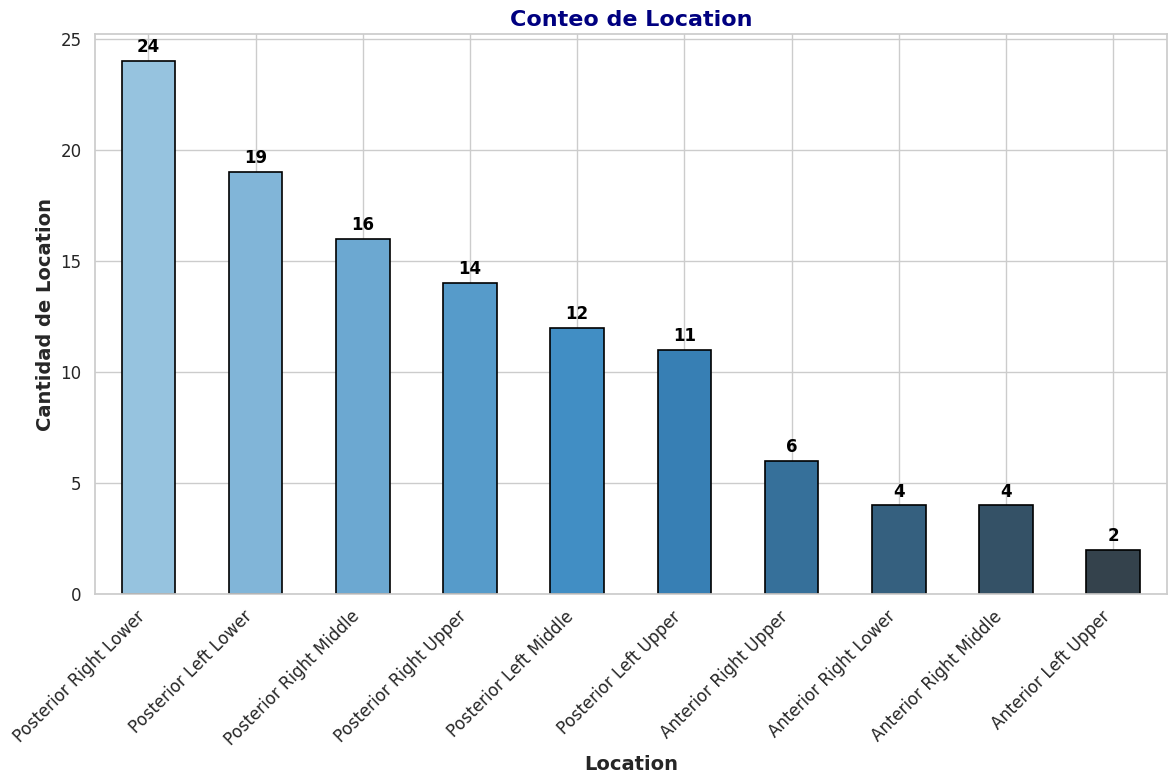

Location
Posterior Right Lower     24
Posterior Left Lower      19
Posterior Right Middle    16
Posterior Right Upper     14
Posterior Left Middle     12
Posterior Left Upper      11
Anterior Right Upper       6
Anterior Right Lower       4
Anterior Right Middle      4
Anterior Left Upper        2
dtype: int64


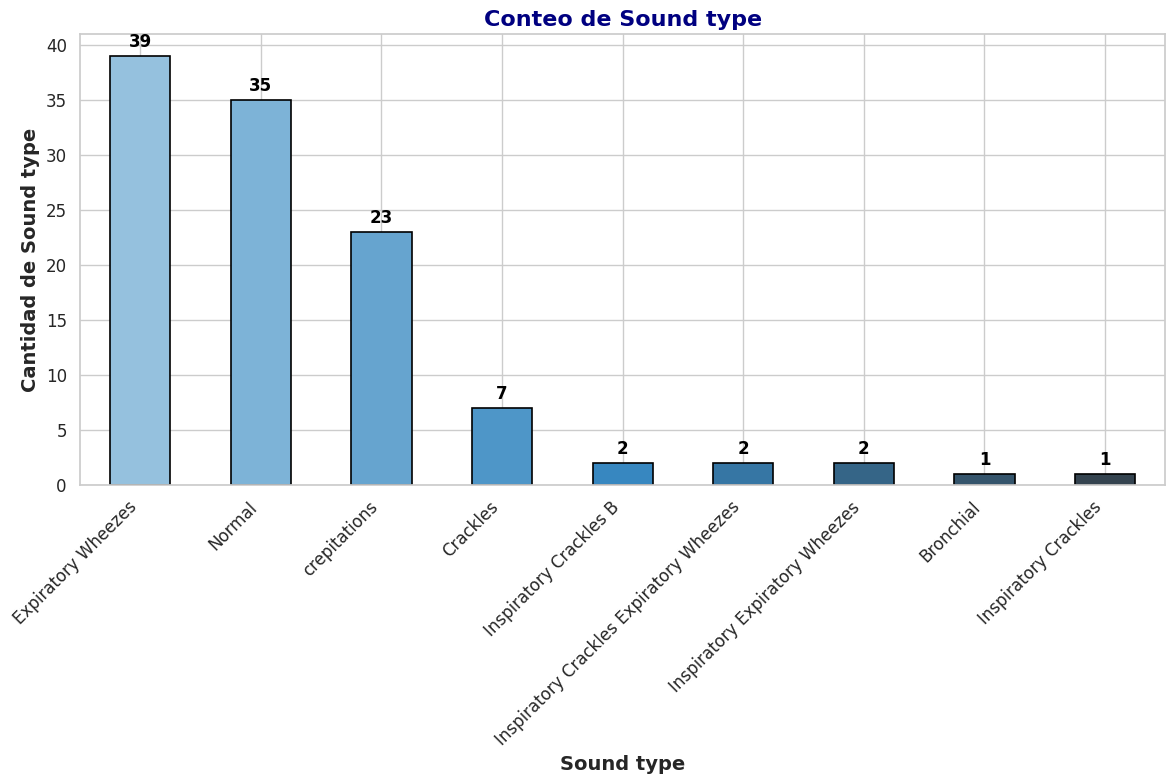

Sound type
Expiratory Wheezes                         39
Normal                                     35
crepitations                               23
Crackles                                    7
Inspiratory Crackles B                      2
Inspiratory Crackles Expiratory Wheezes     2
Inspiratory Expiratory Wheezes              2
Bronchial                                   1
Inspiratory Crackles                        1
dtype: int64


In [ ]:
def plot_counts(df, column_name):
    # Contar la cantidad de diagnósticos por cada valor de la columna
    topic_counts = df.groupby(column_name).size().sort_values(ascending=False)

    # Configurar el estilo de Seaborn
    sns.set(style="whitegrid")

    # Crear gráfico de barras
    plt.figure(figsize=(12, 8))
    ax = topic_counts.plot(kind='bar', color=sns.color_palette("Blues_d", len(topic_counts)), edgecolor='black', linewidth=1.2)

    # Añadir etiquetas y título
    plt.title(f'Conteo de {column_name}', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel(column_name, fontsize=14, fontweight='bold')
    plt.ylabel(f'Cantidad de {column_name}', fontsize=14, fontweight='bold')

    # Ajustar las etiquetas del eje X para mayor legibilidad
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Añadir etiquetas de barras (para mostrar los valores encima de las barras)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black', fontweight='bold',
                    xytext=(0, 10), textcoords='offset points')

    # Ajustar el diseño para que no se sobrepongan las etiquetas
    plt.tight_layout()

    # Mostrar el gráfico con la cuadrícula
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()

    # Imprimir los resultados
    print(topic_counts)

    return topic_counts

# Ejemplo de uso con diferentes columnas
topic_counts_diagnosis = plot_counts(df_cleaned, 'Diagnosis')
topic_counts_location = plot_counts(df_cleaned, 'Location')
topic_counts_sound_type = plot_counts(df_cleaned, 'Sound type')

**Explicación del Script:**

Este script realiza un análisis de datos sobre la columna 'Diagnosis' de un DataFrame. Para cada diagnóstico único, calcula el número de sujetos, la media y desviación estándar de la edad, y la cantidad de hombres y mujeres. Luego, realiza una prueba de normalidad de Shapiro-Wilk en la distribución de edades si el número de sujetos es mayor a 30. Dependiendo del resultado, calcula un intervalo de confianza (paramétrico si la distribución es normal, o no paramétrico mediante bootstrap si no lo es). Los resultados se almacenan en un resumen que incluye el diagnóstico, número de sujetos, media y desviación estándar de la edad, si la distribución es normal, y los intervalos de confianza calculados. Además, el script compara los intervalos de confianza de cada categoría con los de la categoría "Normal" para determinar si se solapan. Finalmente, organiza el resumen por número de sujetos y presenta los resultados ordenados.

# Informe de Análisis de Edad y Diagnóstico en Pacientes con Enfermedades Respiratorias

## Hallazgos Generales:

### 1. Edad Promedio:
- **Normal**: Los sujetos saludables tienen una edad promedio de **43.11 años**, con una desviación estándar de **20.12 años**, lo que indica una amplia variabilidad en el grupo de control.
- **Asthma**: La edad promedio es **45.94 años**, similar a la del grupo "Normal". Este grupo tiene una menor dispersión con una desviación estándar de **15.55 años**.
- **Heart failure**: La edad promedio de los pacientes con insuficiencia cardíaca es de **58.78 años**, siendo mayor que la del grupo "Normal".
- **COPD**: El grupo con EPOC (Enfermedad Pulmonar Obstructiva Crónica) tiene una edad promedio de **57.22 años**, también mayor que la de los sujetos sanos.
- **Pneumonia**: La edad promedio de los pacientes con neumonía es **55.6 años**, también superior a la del grupo "Normal".
- **Lung fibrosis**: Los pacientes con fibrosis pulmonar tienen una edad promedio de **65.0 años**, mostrando una tendencia a ser de mayor edad.
- **Bronchitis**: Los pacientes con bronquitis tienen una edad promedio de **37.33 años**, lo que se acerca más a la de los pacientes sanos, pero con una desviación estándar más alta (**26.63 años**), lo que sugiere mayor variabilidad en el grupo.
- **Comorbilidades (Heart failure + COPD, Heart failure + lung fibrosis, etc.)**: Los grupos con combinaciones de enfermedades tienden a tener una edad promedio aún mayor, especialmente en los casos de **Heart failure + COPD** (**68.0 años**) y **Pleural effusion** (**75.5 años**), lo que refleja un patrón de enfermedades más graves en pacientes de mayor edad.

### 2. Normalidad de la Edad:
- El **grupo "Normal"** no sigue una distribución normal, como lo indica el p-valor del test de Shapiro-Wilk (p-value < 0.05). Esto sugiere que la distribución de la edad en la población saludable no es simétrica.
- En **Asthma**, la edad sigue una distribución normal, ya que los p-valores son mayores que 0.05. Esto indica que las edades en estos grupos están distribuidas de manera más regular.
- Para la mayoría de los diagnósticos (como **Pneumonia**, **Heart failure**, **COPD**, **Lung fibrosis**, y otros), la edad no sigue una distribución normal, lo que sugiere que estos grupos tienen un rango de edades más sesgado o más disperso o que no cuentan con suficientes muestras.

### 3. Intervalos de Confianza (IC):
- Los intervalos de confianza para la edad promedio de cada grupo revelan que, en general, la edad de los pacientes con enfermedades respiratorias graves (como **Heart failure + COPD**, **Pleuric effusion**, y **Heart failure + lung fibrosis**) es significativamente más alta que la de los pacientes sanos.
- **Asthma** tiene un intervalo de confianza que se solapa con el del grupo "Normal", lo que sugiere que las edades de ambos grupos son bastante similares.
- Otros diagnósticos como **COPD**, **Lung fibrosis**, y **Bronchitis** tienen intervalos de confianza que se solapan parcialmente con los de "Normal", lo que implica que, aunque sus edades son mayores en promedio, todavía hay ciertos casos con edades similares a las del grupo control.
- En casos con comorbilidades (como **Heart failure + COPD** y **Heart failure + lung fibrosis**), los intervalos de confianza no se solapan con los del grupo "Normal", lo que indica diferencias más marcadas en la edad.

### 4. Solapamiento con "Normal":
- **Asthma**, **Heart failure**, **Pneumonia**, **Lung fibrosis**, y **Bronchitis** muestran que sus intervalos de confianza se solapan con los del grupo "Normal". Esto sugiere que en estos casos las diferencias de edad no son tan marcadas en comparación con los sujetos sanos, especialmente en el grupo de **Asthma**.
- **COPD**, **Heart failure + COPD**, **Pleuric effusion**, **Heart failure + lung fibrosis**, y **Asthma and lung fibrosis** tienen intervalos de confianza que no se solapan con los de "Normal", lo que refleja diferencias significativas en la edad entre estos pacientes y los sujetos saludables.

## Conclusiones:
- Se observa que las enfermedades respiratorias graves, como **COPD**, **Heart failure + COPD**, y **Pleuric effusion**, tienden a afectar principalmente a pacientes de mayor edad, con edades promedio significativamente mayores que las de los sujetos saludables.
- Los pacientes con diagnósticos más leves, como **Asthma**, muestran una edad promedio cercana a la de los pacientes saludables.
- Los intervalos de confianza proporcionan información valiosa sobre la variabilidad en las edades de los pacientes, ayudando a identificar diferencias significativas en la edad según el diagnóstico.



In [ ]:
# Lista para guardar resultados
resumen_ajustado = []

for diagnosis in df_cleaned['Diagnosis'].unique():
    subset = df_cleaned[df_cleaned['Diagnosis'] == diagnosis]
    num_subjects = subset['Gender'].count()
    mean_age = subset['Age'].mean()
    std_age = subset['Age'].std()
    gender_counts = subset['Gender'].value_counts()
    num_female = gender_counts.get('F', 0)
    num_male = gender_counts.get('M', 0)

    # Prueba de normalidad
    shapiro_test = shapiro(subset['Age']) if num_subjects > 30 else None
    is_normal = shapiro_test.pvalue >= 0.05 if shapiro_test else False

    # Cálculo de intervalos de confianza
    if is_normal:
        # Intervalo paramétrico
        ci_lower = mean_age - 1.96 * std_age / np.sqrt(num_subjects)
        ci_upper = mean_age + 1.96 * std_age / np.sqrt(num_subjects)
    else:
        # Intervalo no paramétrico (bootstrap)
        bootstrap_samples = [
            resample(subset['Age'].dropna(), replace=True, n_samples=np.max([1,int(0.8 * len(subset['Age'].dropna()))])).mean()
            for _ in range(1000)
        ]
        ci_lower = np.percentile(bootstrap_samples, 2.5)
        ci_upper = np.percentile(bootstrap_samples, 97.5)

    # Añadir resultados al resumen
    resumen_ajustado.append({
        'sort_by': num_subjects,
        'Category': diagnosis.capitalize(),
        '# Subjects': f"{num_subjects} ({num_female}F, {num_male}M)",
        'Age (mean)': f"{round(mean_age, 2) if not pd.isna(mean_age) else 'N/A'} ± {round(std_age, 2) if not pd.isna(std_age) else 'N/A'}",
        'Is Normal': is_normal,
        'CI Lower': round(ci_lower, 2),
        'CI Upper': round(ci_upper, 2)
    })

# Crear un DataFrame para el resumen ajustado
df_summary = pd.DataFrame(resumen_ajustado)

# Identificar los intervalos de confianza para la categoría "Normal"
normal_row = df_summary[df_summary['Category'] == 'Normal'].iloc[0]
normal_ci_lower = normal_row['CI Lower']
normal_ci_upper = normal_row['CI Upper']

# Comparar solapamientos de intervalos de confianza con la categoría "Normal"
df_summary['Overlaps with Normal'] = df_summary.apply(
    lambda row: not (row['CI Upper'] < normal_ci_lower or row['CI Lower'] > normal_ci_upper), axis=1
)

df_summary = df_summary.sort_values(by=['sort_by'], ascending=False)[['Category', '# Subjects','Age (mean)', 'Is Normal',	'CI Lower', 'CI Upper',	'Overlaps with Normal']]
df_summary

,Category,# Subjects,Age (mean),Is Normal,CI Lower,CI Upper,Overlaps with Normal
10,Normal,"35 (11F, 24M)",43.11 ± 20.12,False,35.93,50.36,True
0,Asthma,"32 (17F, 15M)",45.94 ± 15.55,True,40.55,51.33,True
4,Heart failure,"18 (8F, 10M)",58.78 ± 18.66,False,48.71,67.64,True
5,Copd,"9 (1F, 8M)",57.22 ± 9.46,False,50.57,63.86,False
6,Pneumonia,"5 (2F, 3M)",55.6 ± 13.09,False,43.50,66.75,True
9,Lung fibrosis,"4 (2F, 2M)",65.0 ± 21.69,False,46.00,85.33,True
8,Bron,"3 (1F, 2M)",37.33 ± 26.63,False,20.00,68.00,True
2,Heart failure + copd,"2 (0F, 2M)",68.0 ± 4.24,False,65.00,71.00,False
3,Plueral effusion,"2 (0F, 2M)",75.5 ± 7.78,False,70.00,81.00,False
1,Heart failure + lung fibrosis,"1 (1F, 0M)",72.0 ± N/A,False,72.00,72.00,False


# Data Merge
---

**Explicación del Script:**

Este script recorre todas las subcarpetas dentro de una carpeta base en busca de archivos .wav, y para cada archivo encontrado, extrae el nombre del archivo, separando la parte antes del primer guion bajo ("\_"). Luego, divide esta parte en letras y números, almacenándolos por separado. Los resultados se almacenan en cuatro listas: filenames (nombre completo del archivo), first_parts (parte antes del primer "\_"), alphabets (letras extraídas de esa parte) y numerics (números extraídos). Posteriormente, crea un DataFrame con estas listas como columnas, convirtiendo la columna de números a tipo entero. Finalmente, el DataFrame resultante se muestra en consola.

In [ ]:
# Crear listas para almacenar las partes extraídas
filenames = []
first_parts = []
alphabets = []
numerics = []

# Recorrer las subcarpetas dentro de la carpeta base
for subdir, _, files in os.walk(extracted_folder):
    wav_files = [file for file in files if file.endswith(".wav")]  # Filtrar archivos .wav
    for wav_file in wav_files:
        # Extraer la parte antes del primer "_"
        filenames.append(wav_file)
        first_part = wav_file.split("_")[0]
        first_parts.append(first_part)

        # Separar letras y números
        alpha = "".join(filter(str.isalpha, first_part))  # Solo letras
        num = "".join(filter(str.isdigit, first_part))  # Solo números
        alphabets.append(alpha)
        numerics.append(num)

# Crear un DataFrame con las columnas
audio_df = pd.DataFrame({
    'Filename': filenames,
    "First_Part": first_parts,
    "Alphabets": alphabets,  # Solo letras
    "Numerics": numerics     # Solo números
})

# Convertir id: Numerics a tipo int
audio_df['Numerics'] = audio_df['Numerics'].astype(int)

# Mostrar el DataFrame final resultante
audio_df

,Filename,First_Part,Alphabets,Numerics
0,"DP11_Heart Failure,C,P L L,53,M.wav",DP11,DP,11
1,"EP26_Lung Fibrosis,Crep,P,90,F.wav",EP26,EP,26
2,"BP72_N,N,P R U,24,F.wav",BP72,BP,72
3,"BP45_heart failure,Crep,P R L ,30,M.wav",BP45,BP,45
4,"EP103_N,N,P R U,81,F.wav",EP103,EP,103
...,...,...,...,...
331,"BP41_pneumonia,Crep,P R M,51,M.wav",BP41,BP,41
332,"DP40_heart failure,Crep,A R M,26,M.wav",DP40,DP,40
333,"EP56_asthma,E W,P R M,56,F.wav",EP56,EP,56
334,"EP43_asthma,E W,P L M,15,M.wav",EP43,EP,43


**Explicación del Script:**

Este script realiza varias operaciones en el DataFrame audio_df. Primero, ordena los datos de este DataFrame por la columna 'Numerics' de forma ascendente. Luego, aplica un mapeo a la columna 'Alphabets', donde valores específicos como 'EP', 'DP', y 'BP' se traducen en descripciones completas de tipos de filtrado y se almacenan en una nueva columna llamada 'Filter type'. A continuación, se realiza una fusión entre audio_df y df_cleaned, utilizando la columna 'Numerics' de audio_df y la columna 'id' de df_cleaned, con un tipo de fusión 'left', lo que significa que se toman todos los registros de audio_df y se combinan con los registros coincidentes de df_cleaned. Después de la fusión, el script selecciona solo algunas columnas relevantes y las muestra en las primeras 5 filas del DataFrame resultante.

In [ ]:
# Ordenar el DataFrame 'audio_df' por la columna 'Numerics' de forma ascendente
audio_df = audio_df.sort_values(by=['Numerics'], ascending=True)

# Mapeo de los valores en la columna 'Alphabets'
alphabet_map = {
    'EP': 'Extended Mode Filtration',
    'DP': 'Diaphragm Mode Filtration',
    'BP': 'Bell Mode Filtration'
}

# Aplicar el mapeo a la columna 'Alphabets'
audio_df['Filter type'] = audio_df['Alphabets'].map(alphabet_map)

# Realizar una fusión (merge) entre 'audio_df' y 'df_cleaned' usando la columna 'Numerics' de 'audio_df' y la columna 'id' de 'df_cleaned'
# La fusión es de tipo 'left', lo que significa que tomará todos los registros de 'audio_df' y los combinará con los registros coincidentes de 'df_cleaned'
df_merge = audio_df.merge(df_cleaned, left_on='Numerics', right_on='id', how='left')

# Mostrar el DataFrame final resultante después de la fusión y eliminación de columnas
df_merge = df_merge[['id', 'Numerics', 'Filename', 'First_Part', 'Alphabets', 'Filter type', 'Age', 'Gender', 'Location','Sound type', 'Diagnosis']]
df_merge.head(5)

,id,Numerics,Filename,First_Part,Alphabets,Filter type,Age,Gender,Location,Sound type,Diagnosis
0,1,1,"BP1_Asthma,I E W,P L L,70,M.wav",BP1,BP,Bell Mode Filtration,70.0,M,Posterior Left Lower,Inspiratory Expiratory Wheezes,asthma
1,1,1,"DP1_Asthma,I E W,P L L,70,M.wav",DP1,DP,Diaphragm Mode Filtration,70.0,M,Posterior Left Lower,Inspiratory Expiratory Wheezes,asthma
2,1,1,"EP1_Asthma,I E W,P L L,70,M.wav",EP1,EP,Extended Mode Filtration,70.0,M,Posterior Left Lower,Inspiratory Expiratory Wheezes,asthma
3,2,2,"EP2_Asthma,E W,P L L R,52,F.wav",EP2,EP,Extended Mode Filtration,52.0,F,Posterior Left Lower,Expiratory Wheezes,asthma
4,2,2,"DP2_Asthma,E W,P L L R,52,F.wav",DP2,DP,Diaphragm Mode Filtration,52.0,F,Posterior Left Lower,Expiratory Wheezes,asthma


# Análisis de los Resultados de Audio por Diagnóstico
---

### 1. **Descripción General del Script:**
Este script realiza un análisis exhaustivo de los archivos de audio asociados a diferentes diagnósticos médicos. Para un ID seleccionado, se extraen y grafican varios aspectos de los audios, incluyendo las señales en el tiempo, la respuesta en frecuencia mediante la Transformada Rápida de Fourier (FFT), los histogramas de las señales y las duraciones de los audios.

### 2. **Procesamiento de Archivos de Audio:**
El script utiliza una función de suavizado de la respuesta en frecuencia para filtrar las señales de audio y mejorar la precisión de los análisis. A través de una serie de gráficos, se muestran:
- **Señales en el tiempo:** Cada archivo de audio es graficado para mostrar cómo varía la amplitud a lo largo del tiempo, permitiendo la comparación visual de las señales.
- **Respuesta en frecuencia:** La FFT se aplica a cada señal de audio, limitando el análisis a frecuencias entre 0 y 800 Hz, que es el rango relevante para muchos de los sonidos respiratorios. Se utiliza un filtro de media móvil para suavizar las curvas y hacer más legible la respuesta en frecuencia.
- **Histogramas de amplitud:** Los histogramas muestran la distribución de las amplitudes de cada archivo de audio, proporcionando información sobre la intensidad de los sonidos registrados.
- **Duración de los archivos de audio:** Finalmente, se visualiza la duración de cada archivo de audio en segundos, lo cual es útil para comprender la extensión de las grabaciones.

### 3. **Resultados Específicos del Muestreo:**
El script también realiza un **muestreo estratificado** por diagnóstico, lo que significa que para cada tipo de diagnóstico (como asma, insuficiencia cardíaca, etc.), se selecciona un ID aleatorio dentro del rango de edad entre 50 y 70 años, con una ubicación específica (en este caso, "Posterior Right Lower"). Los audios correspondientes a estos IDs son luego procesados y graficados.

### 4. **Visualización y Análisis:**
A través de los gráficos generados, es posible observar patrones en las señales de audio asociadas a diferentes diagnósticos:
- **Señales en el tiempo** proporcionan información sobre la variabilidad temporal de las señales respiratorias, lo cual puede ser útil para detectar ruidos característicos de ciertas condiciones médicas.
- **La respuesta en frecuencia** ayuda a identificar características específicas de los sonidos respiratorios, como las sibilancias o los crepitaciones, asociadas a trastornos pulmonares como el asma o la fibrosis pulmonar.
- **Los histogramas** permiten evaluar la distribución de las amplitudes de los sonidos y la prevalencia de ciertas características acústicas.
- **Las duraciones** de los audios proporcionan un contexto adicional para cada grabación, lo cual puede ser útil para la segmentación de los datos o el análisis comparativo entre distintos grupos.


<ipython-input-12-5842870ff977>:148: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=1))  # Muestrea 1 elemento por Diagnosis


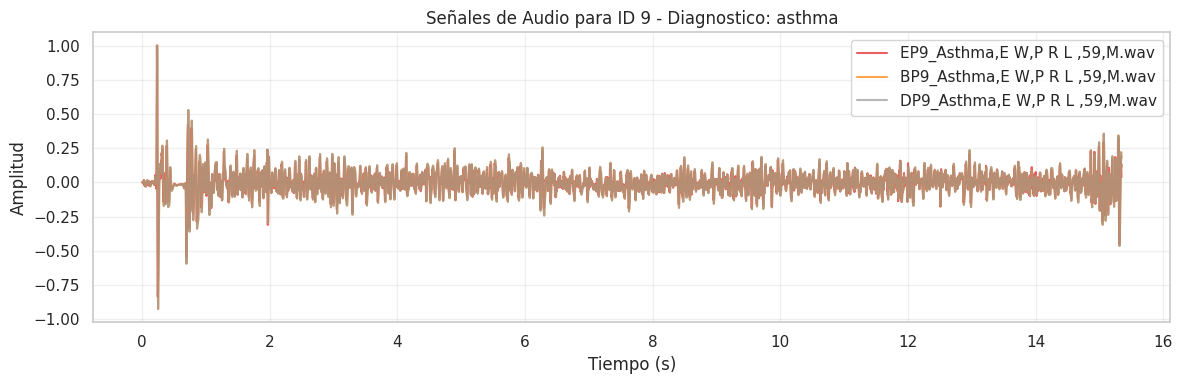

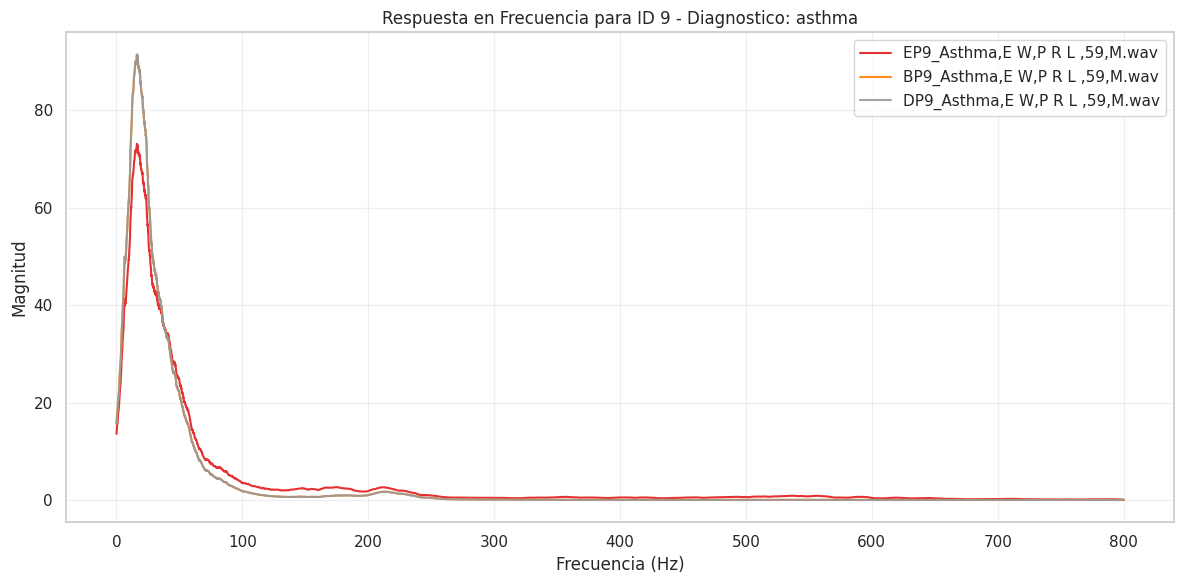

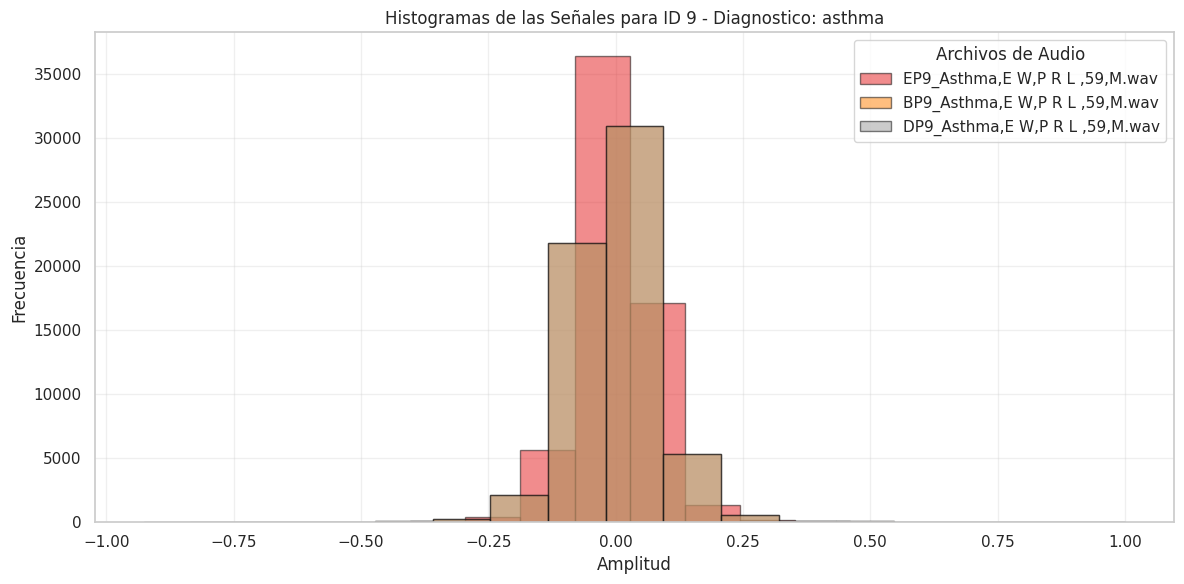

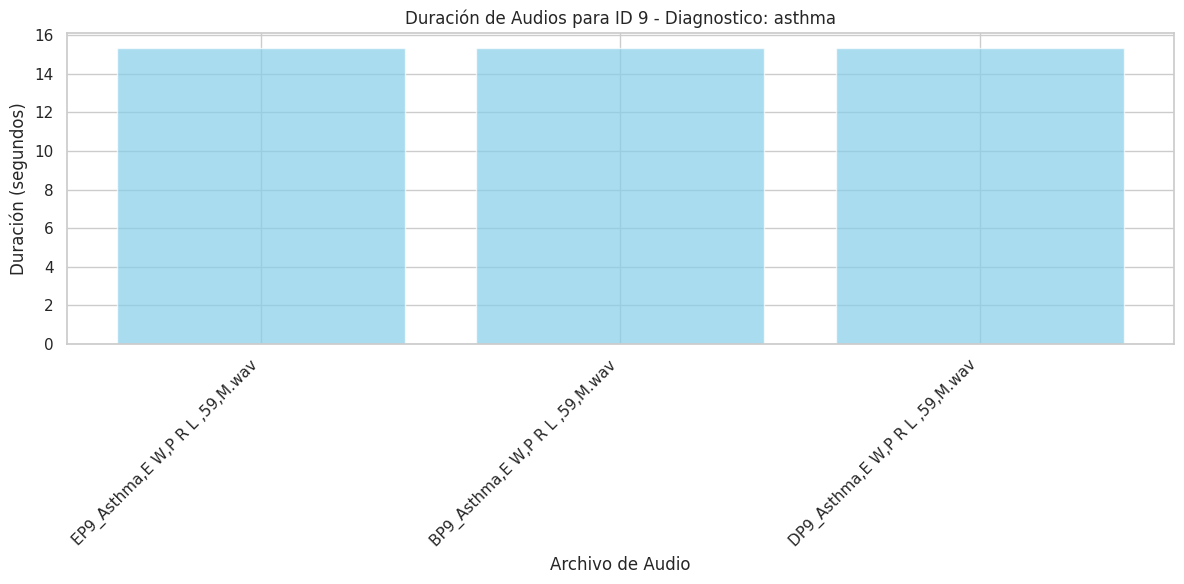

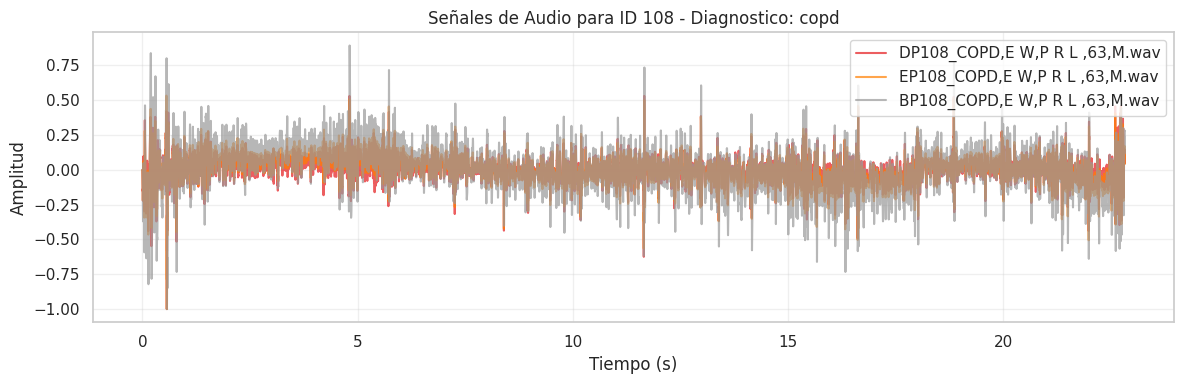

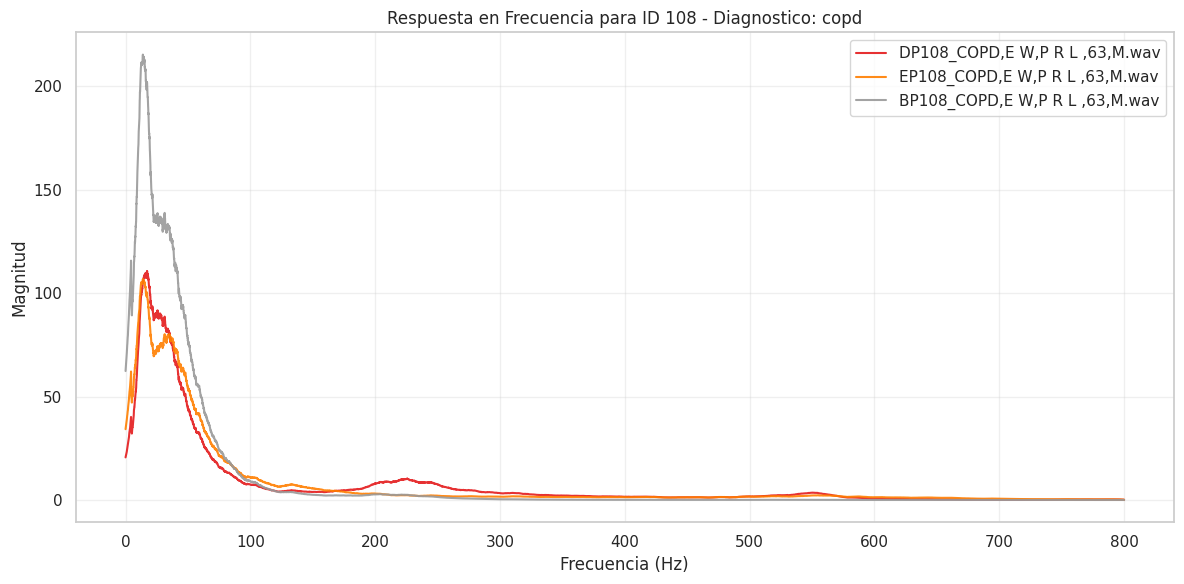

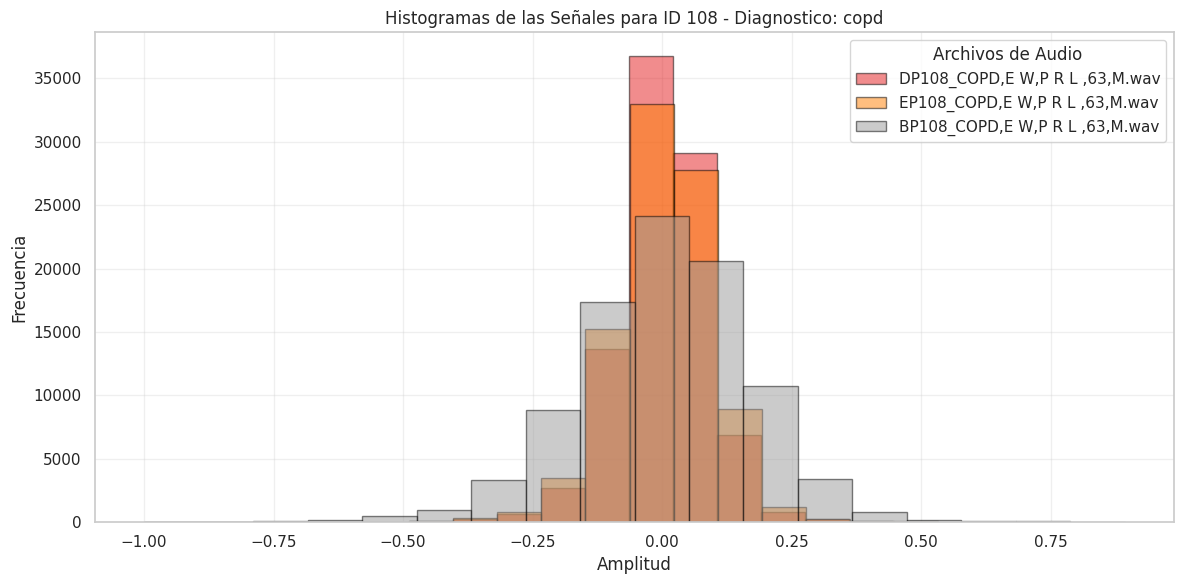

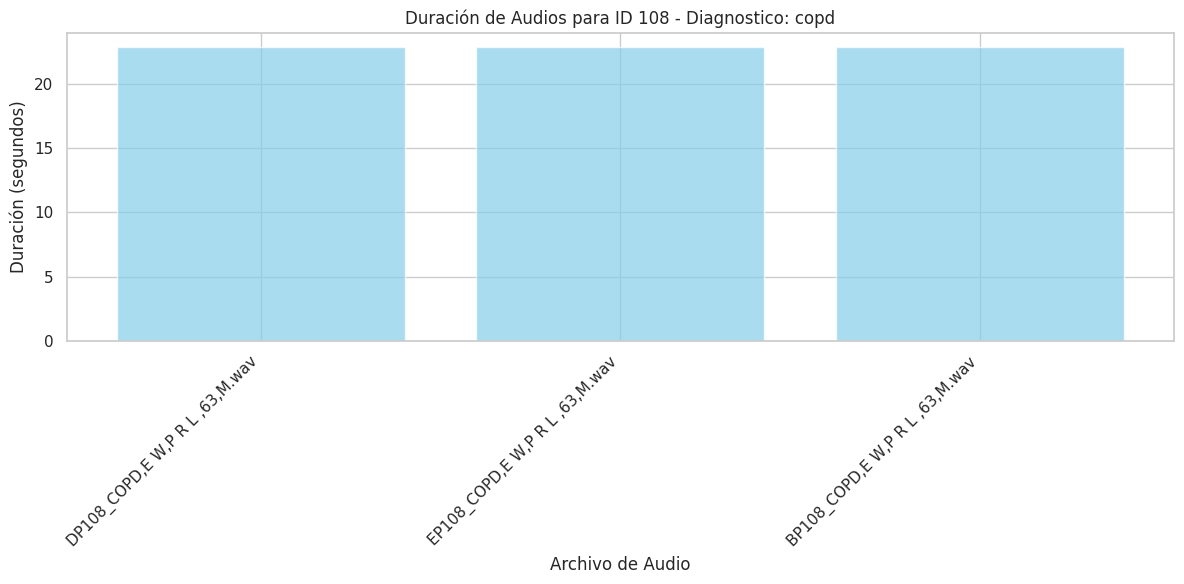

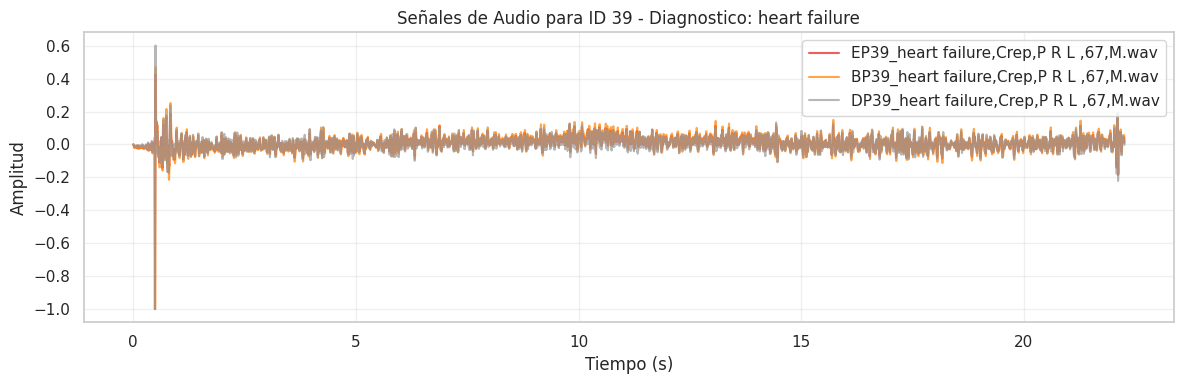

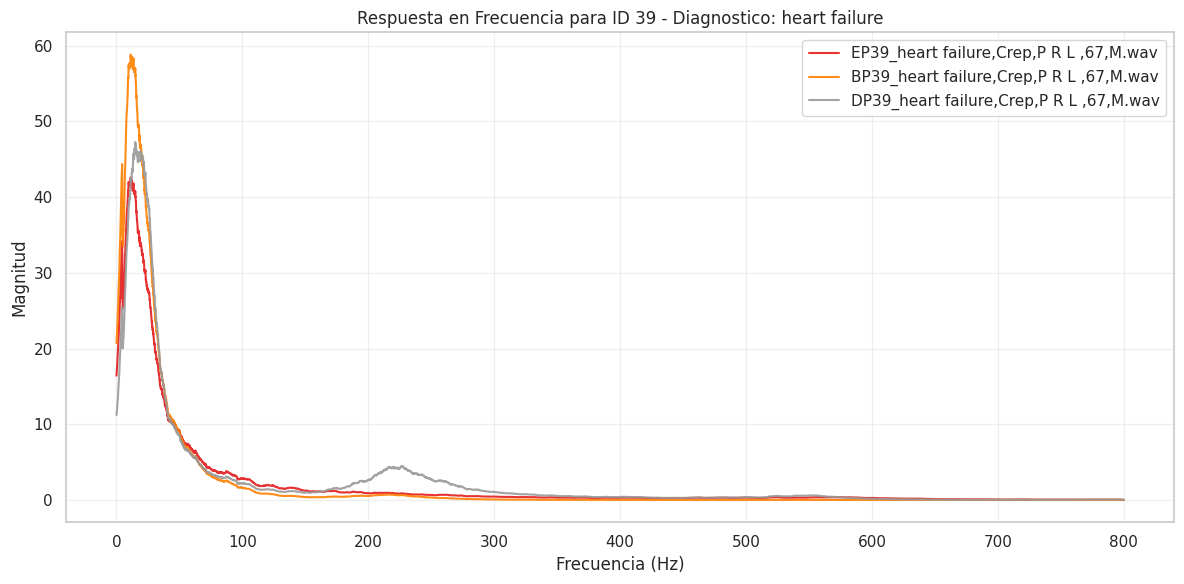

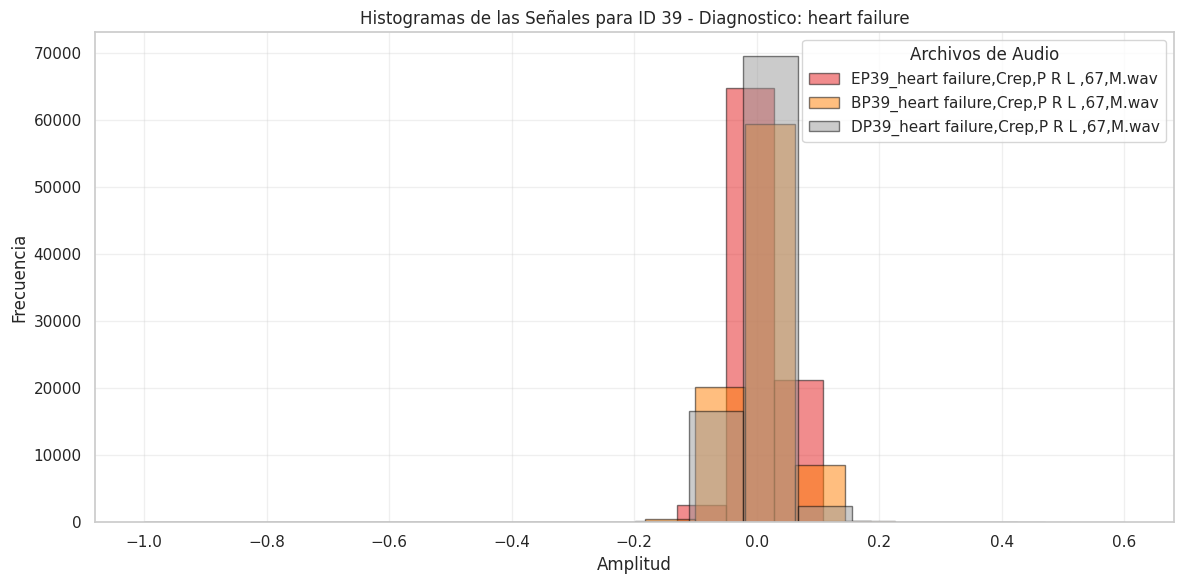

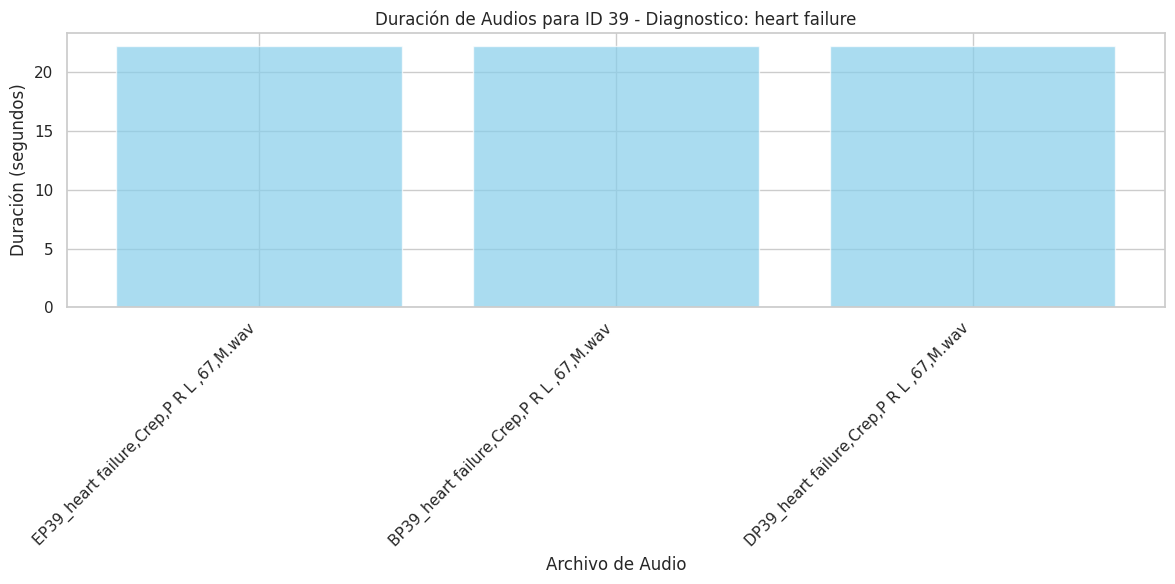

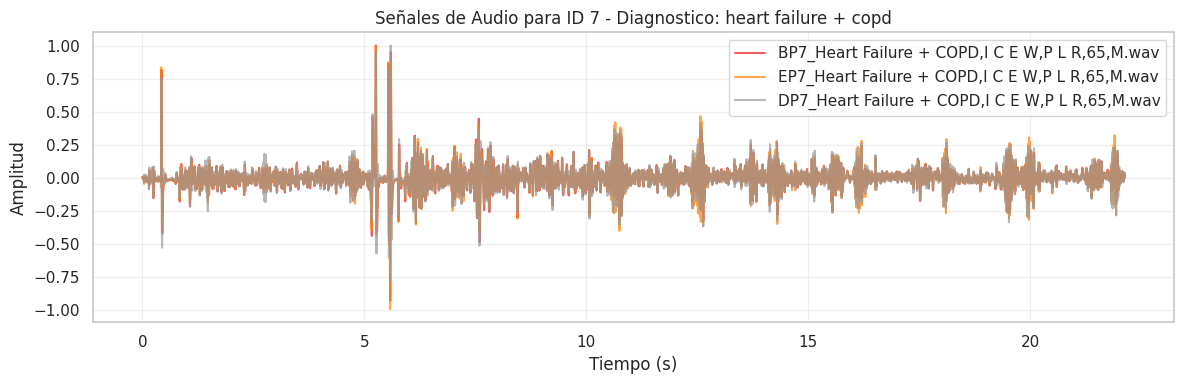

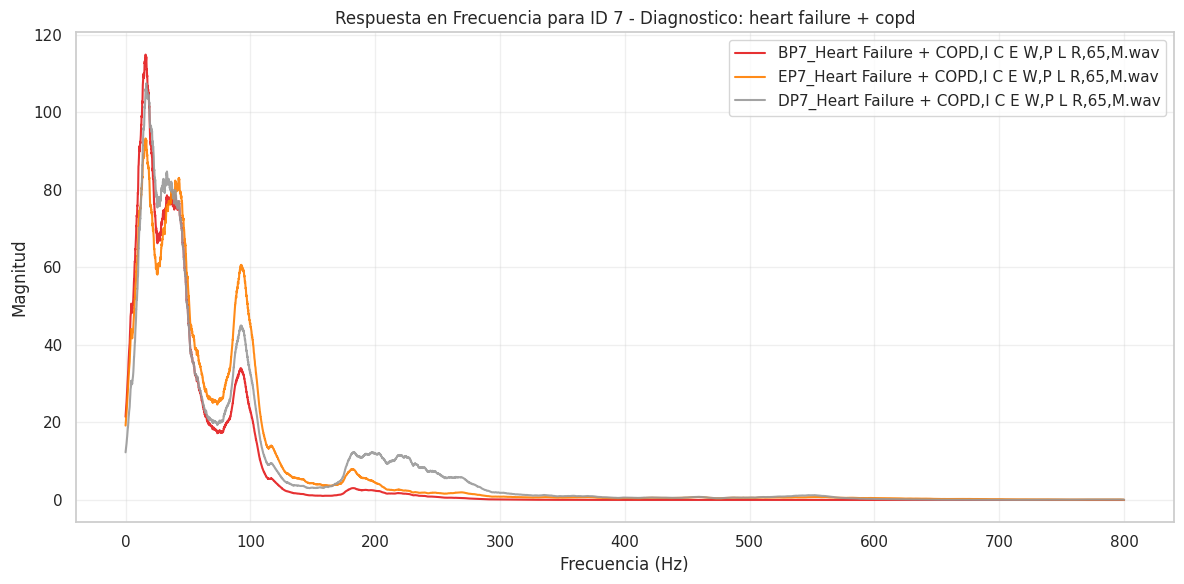

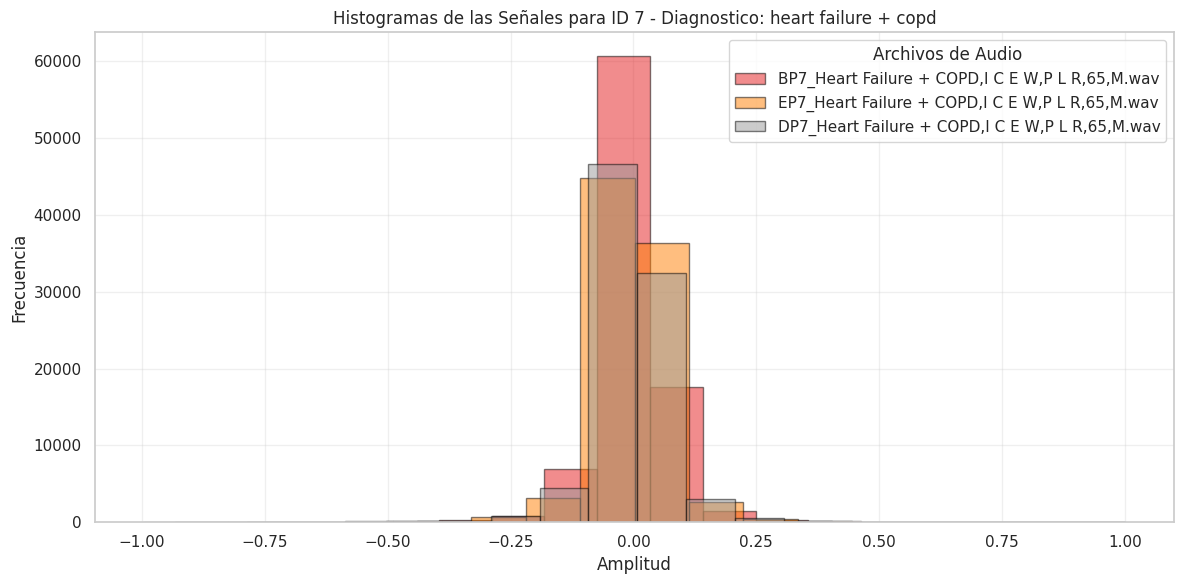

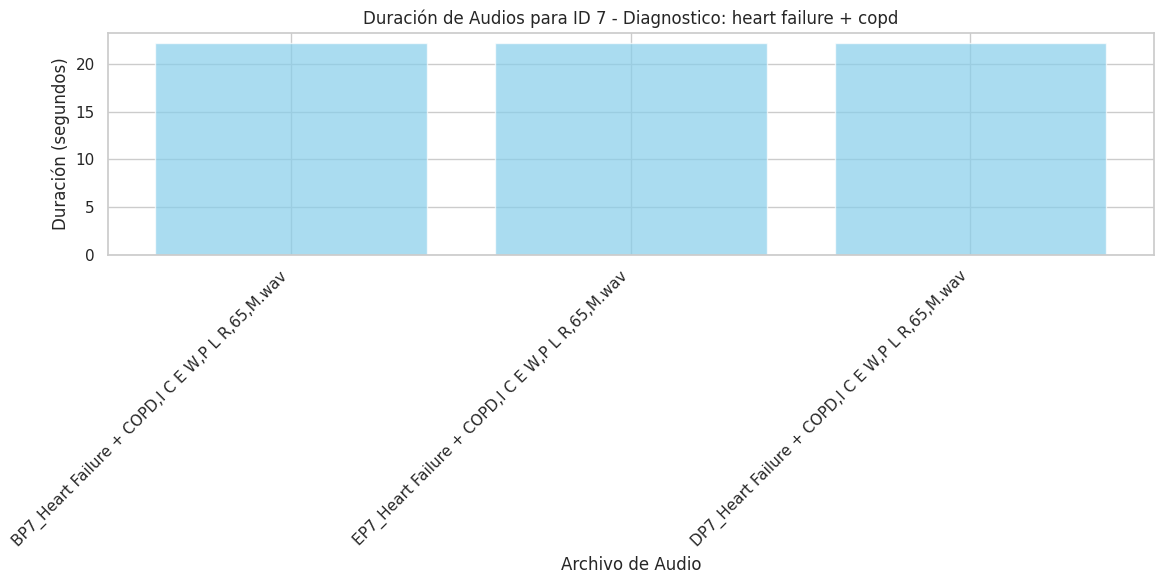

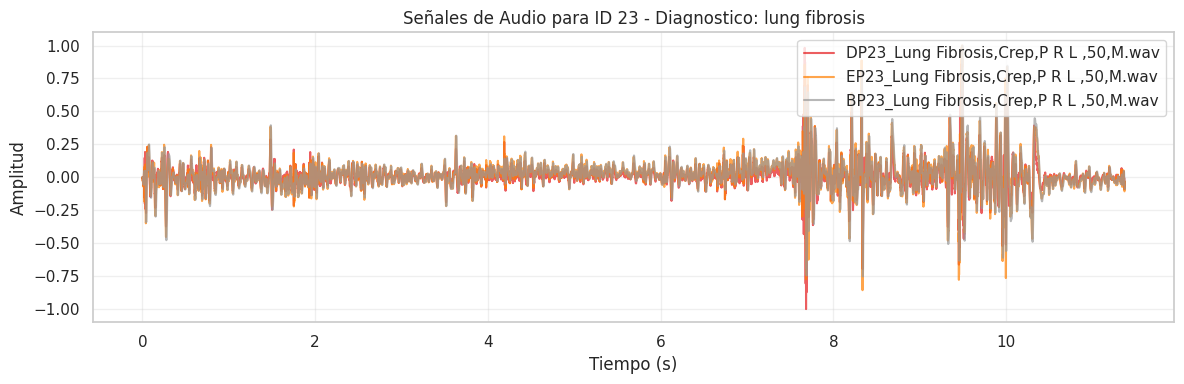

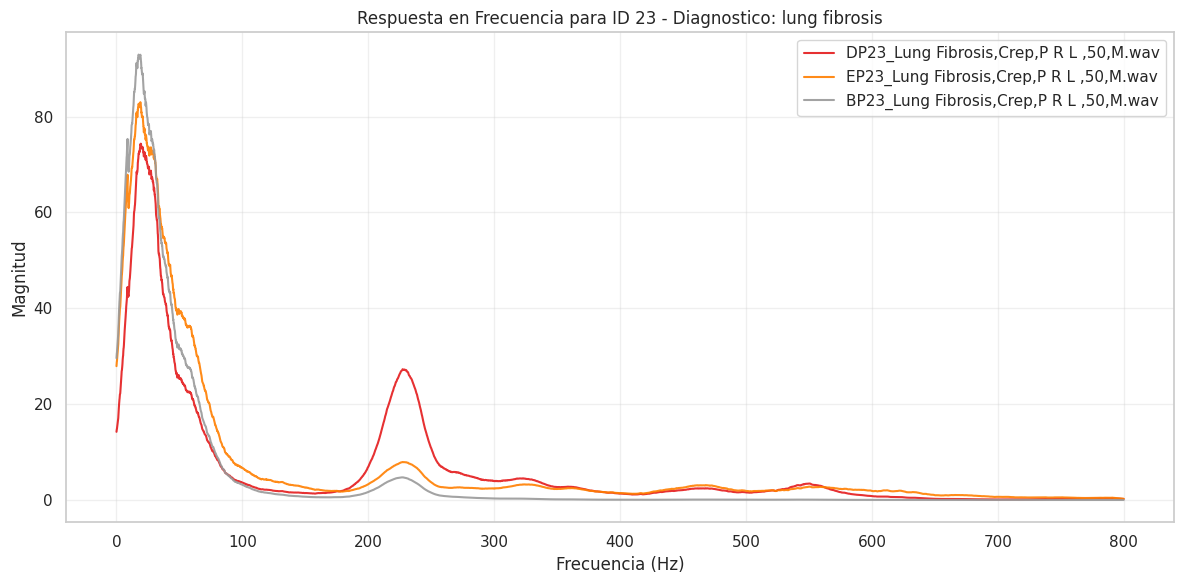

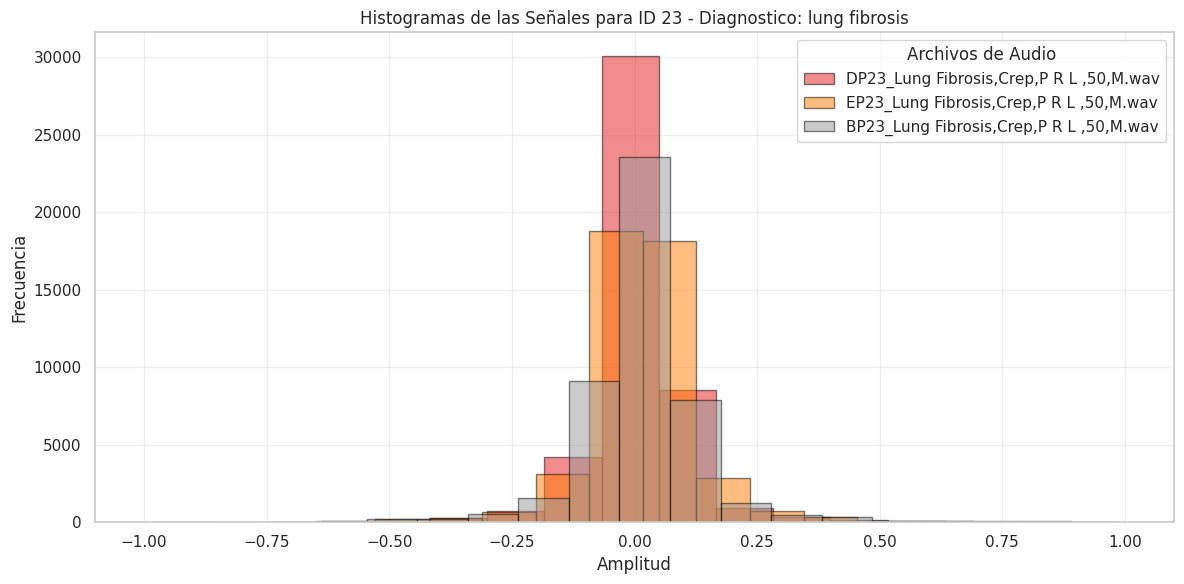

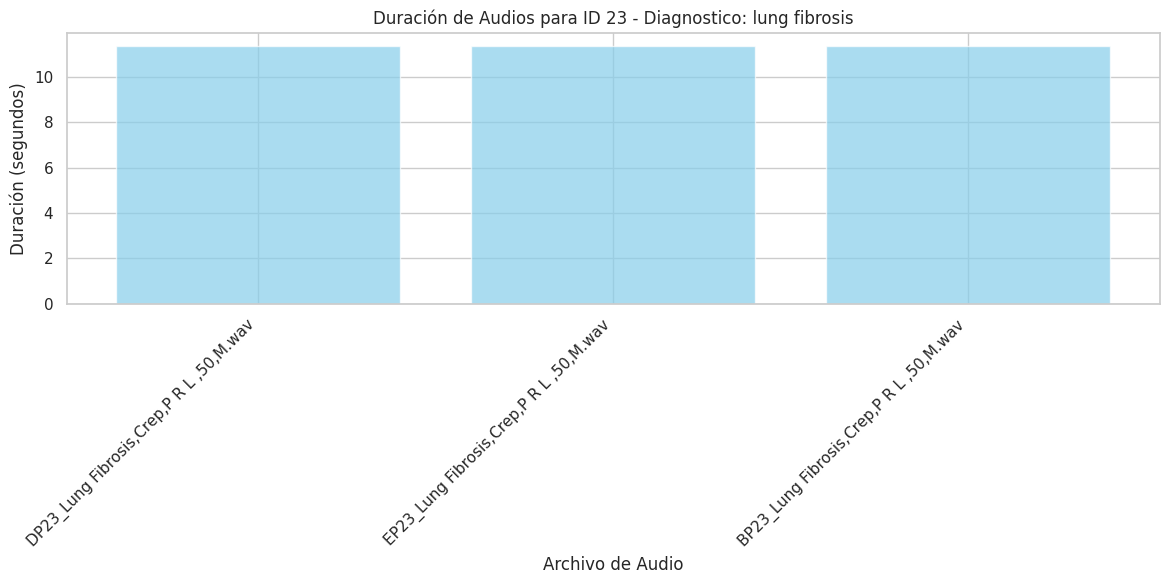

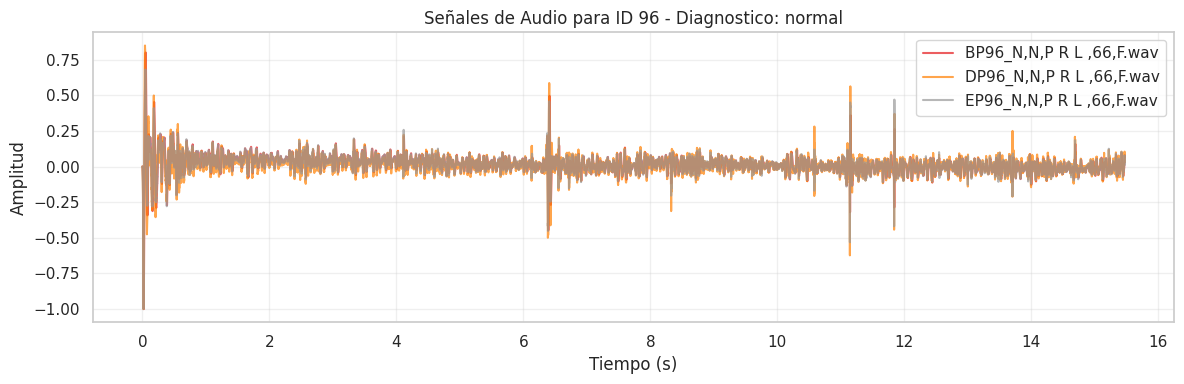

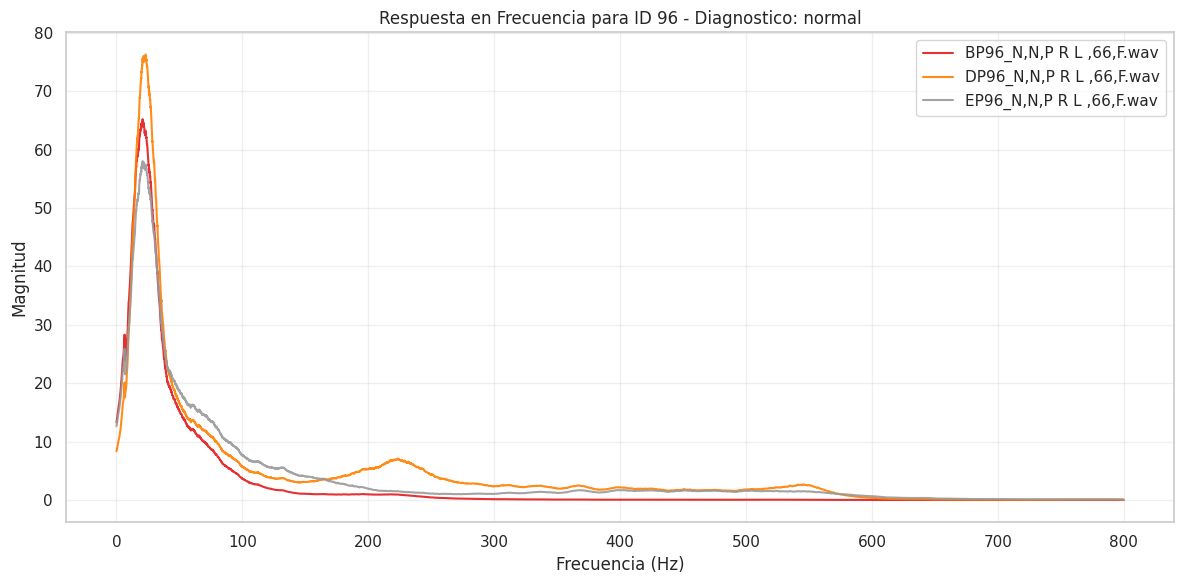

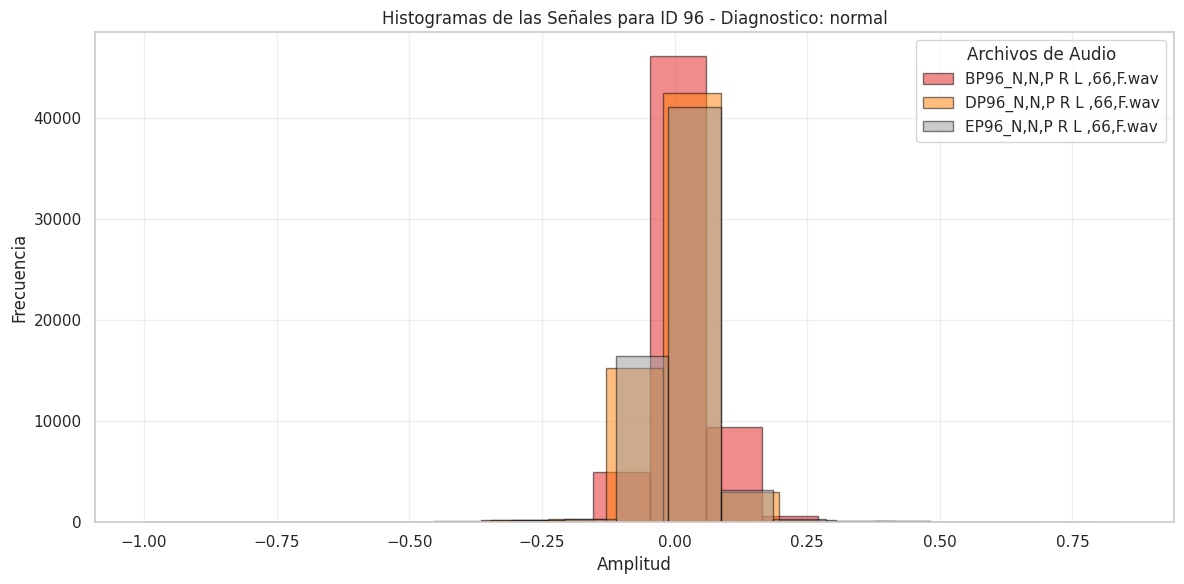

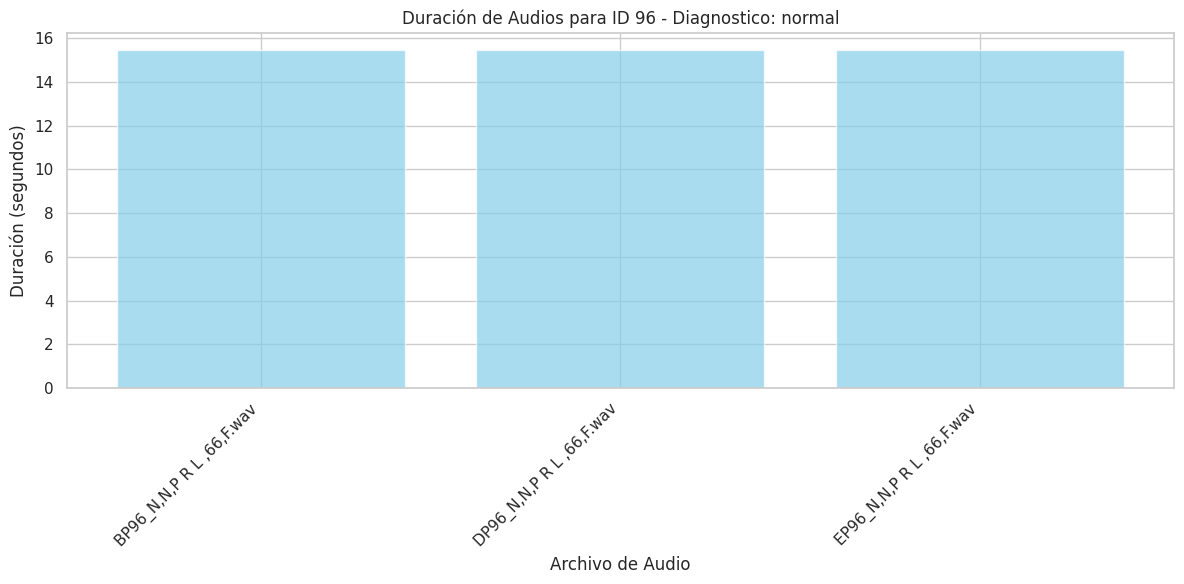

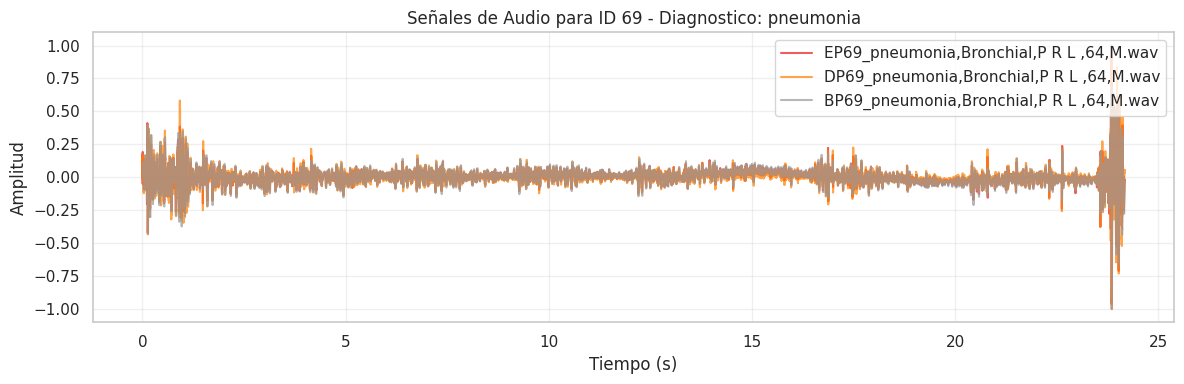

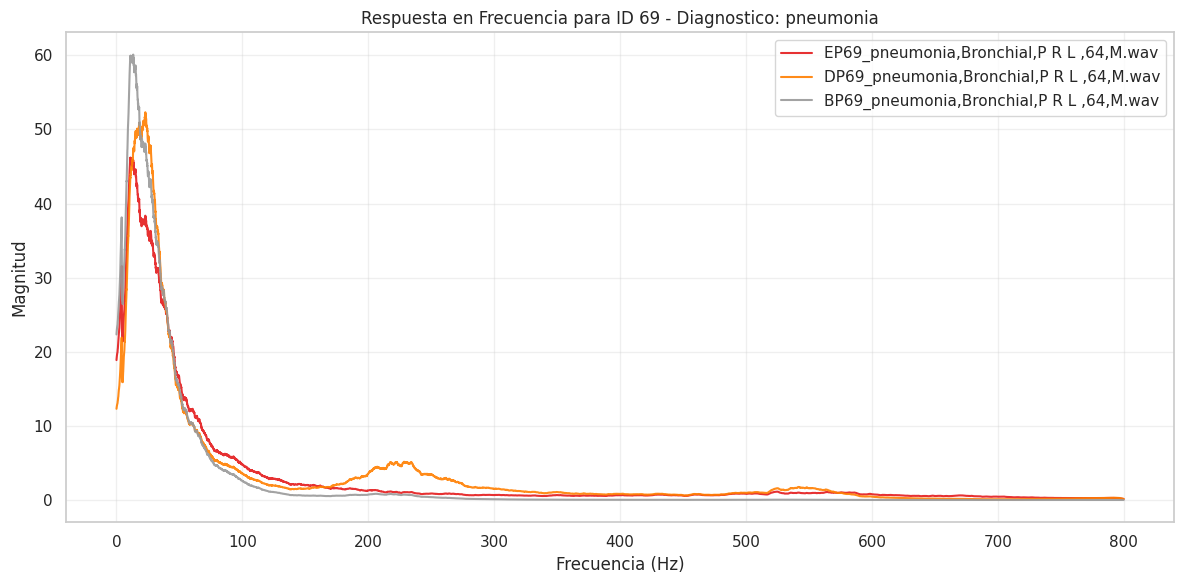

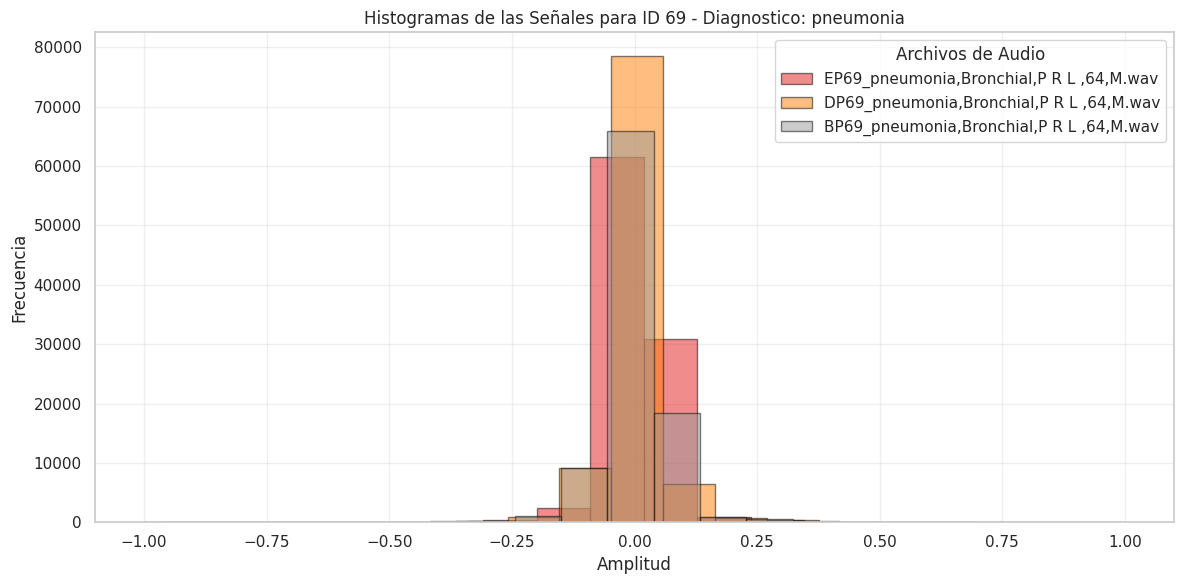

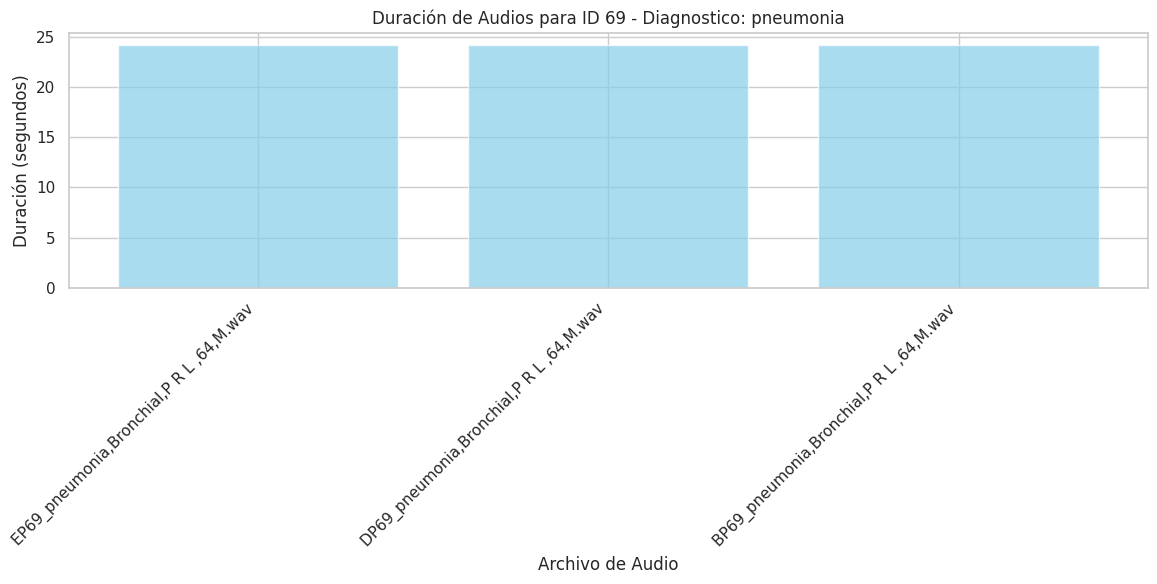

In [ ]:
# Ruta base donde se encuentran los archivos de audio
audio_folder = f"/content/extracted_data_{current_date}/Audio Files"

# Función para suavizar la respuesta en frecuencia utilizando un filtro de media móvil
def smooth_signal(signal, window_size=10):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

# Función principal para graficar y analizar
def plot_audios_by_id(selected_id, audio_folder, df_merge):
    # Filtrar DataFrame por el ID seleccionado
    filtered_df = df_merge[df_merge["Numerics"] == selected_id]

    if filtered_df.empty:
        print(f"No se encontraron archivos para el ID {selected_id}.")
        return

    # Listas para almacenar datos y duraciones
    durations = []
    filenames = []
    audio_signals = {}

    # Colores para las diferentes señales
    colors = plt.get_cmap('Set1', len(filtered_df))

    # Graficar todas las señales en el tiempo
    plt.figure(figsize=(12, 4))

    for idx, (_, row) in enumerate(filtered_df.iterrows()):
        filename = row["Filename"]
        filepath = os.path.join(audio_folder, filename)
        diagnosis = row["Diagnosis"]

        # Verificar si el archivo existe
        if os.path.exists(filepath):
            # Leer el archivo .wav
            sample_rate, data = wavfile.read(filepath)
            duration = len(data) / sample_rate  # Calcular la duración
            data = data / (2**15)

            # Guardar información
            durations.append(duration)
            filenames.append(filename)
            audio_signals[filename] = data  # Almacenar la señal para análisis

            # Graficar la serie de tiempo
            time_axis = [i / sample_rate for i in range(len(data))]
            plt.plot(time_axis, data, color=colors(idx), alpha=0.7, label=filename)

    # Añadir etiquetas al gráfico de la serie de tiempo
    plt.title(f"Señales de Audio para ID {selected_id} - Diagnostico: {diagnosis}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Graficar la respuesta en frecuencia para cada archivo
    plt.figure(figsize=(12, 6))

    for idx, (_, row) in enumerate(filtered_df.iterrows()):
        filename = row["Filename"]
        filepath = os.path.join(audio_folder, filename)

        # Verificar si el archivo existe
        if os.path.exists(filepath):
            # Leer el archivo .wav
            sample_rate, data = wavfile.read(filepath)
            data = data / (2**15)

            # Aplicar la ventana de Hamming
            window = np.hamming(len(data))
            data_windowed = data * window  # Señal multiplicada por la ventana

            # Realizar la Transformada Rápida de Fourier (FFT)
            N = len(data_windowed)
            freqs = np.fft.fftfreq(N, 1 / sample_rate)
            fft_values = np.fft.fft(data_windowed)
            fft_magnitude = np.abs(fft_values)[:N // 2]
            freqs = freqs[:N // 2]

            # Limitar el rango de observación entre 0 y 800 Hz
            freq_mask = (freqs >= 0) & (freqs <= 800)
            freqs_limited = freqs[freq_mask]
            fft_magnitude_limited = fft_magnitude[freq_mask]

            # Suavizar la respuesta en frecuencia
            fft_magnitude_smoothed = smooth_signal(fft_magnitude_limited, window_size=int(sample_rate*0.5*0.1))

            # Graficar la respuesta en frecuencia suavizada
            plt.plot(freqs_limited, fft_magnitude_smoothed, color=colors(idx), alpha=0.9, label=filename)

    # Añadir etiquetas al gráfico de la respuesta en frecuencia
    plt.title(f"Respuesta en Frecuencia para ID {selected_id} - Diagnostico: {diagnosis}")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud")
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Graficar todos los histogramas de las señales en el tiempo en un solo gráfico
    plt.figure(figsize=(12, 6))
    for idx, (_, row) in enumerate(filtered_df.iterrows()):
        filename = row["Filename"]
        if filename in audio_signals:
            data = audio_signals[filename]

            # Graficar histograma para cada señal
            num_bins = int(np.ceil(np.log2(len(data)) + 1))
            plt.hist(data, bins=num_bins, color=colors(idx), alpha=0.5, label=filename, edgecolor='black')

    # Añadir etiquetas y título al gráfico del histograma
    plt.title(f"Histogramas de las Señales para ID {selected_id} - Diagnostico: {diagnosis}")
    plt.xlabel("Amplitud")
    plt.ylabel("Frecuencia")
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title="Archivos de Audio")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Generar gráfico de duraciones si hay archivos encontrados
    if durations:
        plt.figure(figsize=(12, 6))
        plt.bar(filenames, durations, color="skyblue", alpha=0.7)
        plt.xlabel("Archivo de Audio")
        plt.ylabel("Duración (segundos)")
        plt.title(f"Duración de Audios para ID {selected_id} - Diagnostico: {diagnosis}")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.grid(True)
        plt.show()
    else:
        print(f"No se encontraron audios válidos para el ID {selected_id}.")


# Realizar una muestra estratificada, extrayendo un ID aleatorio de cada grupo de Diagnosis
# random_ids_per_diagnosis = df_merge.groupby('Diagnosis').apply(lambda x: x.sample(n=1))['id'].tolist()

# Filtrar por Location y rango de Edad (ej. 50 a 70 años)
filtered_df = df_merge[(df_merge['Location'] == 'Posterior Right Lower') &
                       (df_merge['Age'] >= 50) &
                       (df_merge['Age'] <= 70)]

# Realizar el muestreo por Diagnosis
random_ids_per_diagnosis = (
    filtered_df.groupby('Diagnosis')
    .apply(lambda x: x.sample(n=1))  # Muestrea 1 elemento por Diagnosis
    ['id']
    .tolist()
)

for i in random_ids_per_diagnosis:
  # Ejecutar la función para un ID específico
  plot_audios_by_id(selected_id=i, audio_folder=audio_folder, df_merge=df_merge)

**Explicación del Script:**

Este script realiza varias transformaciones en el DataFrame df_cleaned. Primero, crea un nuevo DataFrame data_expanded al dividir los valores en la columna 'Diagnosis' por los delimitadores +, & o 'and', lo que genera nuevas filas para cada diagnóstico combinado. Luego, se limpian los espacios adicionales en los valores de la columna 'Diagnosis'. A continuación, calcula la frecuencia absoluta y relativa (en porcentaje) para las columnas 'Sound type' y 'Location' en el DataFrame expandido, utilizando value_counts(). Los resultados se almacenan en dos DataFrames: sound_type_summary y location_summary, que incluyen la frecuencia absoluta y el porcentaje relativo para cada valor en esas columnas.

# Análisis de Distribución de Tipos de Sonido y Ubicaciones de los Sonidos Pulmonares
---

### 1. **Tipos de Sonido:**
La distribución de los **tipos de sonido** revela que las **sibilancias espiratorias** (Expiratory Wheezes) son las más comunes, representando **33.6%** de los registros. Le siguen los sonidos **normales** con un **30.2%** de frecuencia, lo que indica una alta proporción de pacientes sin patologías pulmonares significativas. Otros sonidos relevantes incluyen **crepitaciones** (19.8%), que están asociadas a patologías como la fibrosis pulmonar y la insuficiencia cardíaca. Los **crackles** y otros sonidos menos frecuentes como **wheezes inspiratorios** y **bronquiales** representan una porción más pequeña de los datos, reflejando la menor prevalencia de estas condiciones.

### 2. **Ubicaciones de los Sonidos:**
En cuanto a las **ubicaciones** de los sonidos, la mayoría de las grabaciones provienen de las zonas **posteriores** del pecho, siendo la **posterior derecha inferior** (23.3%) la más representada, seguida por la **posterior izquierda inferior** (16.4%) y la **posterior derecha media** (13.8%). Las zonas anteriores, como la **anterior derecha superior** (5.2%) y **anterior derecha media** (4.3%), tienen una menor representación, lo que podría reflejar una mayor sensibilidad o relevancia clínica en las ubicaciones posteriores para la detección de sonidos pulmonares.


In [ ]:
# Crear un nuevo DataFrame que expanda las combinaciones
data_expanded = df_cleaned.assign(Diagnosis=df_cleaned['Diagnosis'].str.split(r'[+&]|and')).explode('Diagnosis')
data_expanded['Diagnosis'] = data_expanded['Diagnosis'].str.strip()  # Limpiar espacios

# Frecuencia absoluta y relativa para la columna 'Sound type'
sound_type_counts = data_expanded['Sound type'].value_counts()
sound_type_percentage = data_expanded['Sound type'].value_counts(normalize=True) * 100

# Frecuencia absoluta y relativa para la columna 'Location'
location_counts = data_expanded['Location'].value_counts()
location_percentage = data_expanded['Location'].value_counts(normalize=True) * 100

# Mostrar tablas de frecuencias
sound_type_summary = pd.DataFrame({'Absolute Count': sound_type_counts, 'Relative Percentage (%)': sound_type_percentage})
location_summary = pd.DataFrame({'Absolute Count': location_counts, 'Relative Percentage (%)': location_percentage})

In [ ]:
# Mostrar las tablas
print("Sound Type Frequency Table:")
sound_type_summary

Sound Type Frequency Table:


,Absolute Count,Relative Percentage (%)
Sound type,,
Expiratory Wheezes,39,33.620690
Normal,35,30.172414
crepitations,23,19.827586
Crackles,8,6.896552
Inspiratory Crackles Expiratory Wheezes,4,3.448276
Inspiratory Expiratory Wheezes,2,1.724138
Inspiratory Crackles,2,1.724138
Inspiratory Crackles B,2,1.724138
Bronchial,1,0.862069


In [ ]:
# Mostrar las tablas
print("\nLocation Frequency Table:")
location_summary


Location Frequency Table:


,Absolute Count,Relative Percentage (%)
Location,,
Posterior Right Lower,27,23.275862
Posterior Left Lower,19,16.379310
Posterior Right Middle,16,13.793103
Posterior Right Upper,14,12.068966
Posterior Left Middle,12,10.344828
Posterior Left Upper,11,9.482759
Anterior Right Upper,6,5.172414
Anterior Right Middle,5,4.310345
Anterior Right Lower,4,3.448276


**Explicación del Script:**

Este script realiza un análisis de outliers en la columna 'Age' de un DataFrame df_cleaned, que contiene diagnósticos y otras variables. Primero, expande la columna 'Diagnosis' dividiendo las combinaciones de diagnósticos (separados por +, &, o 'and') y crea nuevas filas para cada diagnóstico. Luego, define una función identify_outliers que utiliza el método del rango intercuartil (IQR) para identificar outliers en la columna de edad, por cada diagnóstico. Después, aplica esta función al DataFrame expandido para encontrar los outliers en la edad por diagnóstico, y muestra los resultados. Finalmente, crea un gráfico de tipo boxplot para visualizar la distribución de edades por diagnóstico, destacando posibles outliers en el gráfico.

# Análisis de Casos Atípicos por Edad y Diagnóstico
---

En el análisis de los datos de diagnóstico y edad, se utilizaron las funciones de identificación de valores atípicos a través del **rango intercuartílico (IQR)**, lo que permitió detectar casos que se desvían significativamente de las distribuciones esperadas por diagnóstico. A continuación se analizan dos casos específicos:

## 1. **Caso: "Asthma and Lung Fibrosis" (Diagnóstico Combinado)**

- **Paciente**: Masculino, 90 años
- **Diagnóstico**: **Asma y Fibrosis Pulmonar**

Este caso es un ejemplo de un paciente de edad avanzada (90 años) diagnosticado con **asma** y **fibrosis pulmonar**, lo que es un diagnóstico combinado. Al descomponer el diagnóstico utilizando el método de **`explode`**, se observa que este paciente presenta un valor atípico en cuanto a su **edad** en la categoría de **asma**, ya que los pacientes con **asma** suelen ser más jóvenes.

La combinación con **fibrosis pulmonar**, sin embargo, es más congruente con una persona de edad avanzada, ya que la **fibrosis pulmonar** está generalmente asociada con una progresión lenta y síntomas que aparecen a medida que las personas envejecen. Por lo tanto, este caso representa una **discordancia** en el comportamiento típico de la edad para **asma** debido a la presencia de la **fibrosis pulmonar**.

### Implicaciones:
Este caso resalta la importancia de considerar comorbilidades al analizar los datos de salud. En este contexto, el diagnóstico combinado afecta significativamente la interpretación de la edad promedio para **asma**. La **fibrosis pulmonar** en un paciente de edad avanzada introduce un sesgo en la distribución de edades, lo que convierte a este paciente en un caso atípico dentro de los patrones generales de asma.

## 2. **Caso: "Heart Failure" (Insuficiencia Cardíaca)**

- **Paciente**: Femenino, 24 años
- **Diagnóstico**: **Insuficiencia Cardíaca**

En este caso, un paciente femenino de **24 años** presenta **insuficiencia cardíaca**, lo cual es considerado un caso atípico, ya que la **insuficiencia cardíaca** es más comúnmente diagnosticada en personas de mayor edad (generalmente mayores de 60 años). Este caso muestra un diagnóstico grave en un paciente joven, lo que podría estar relacionado con condiciones genéticas, enfermedades congénitas del corazón, o problemas clínicos poco comunes en individuos jóvenes.

### Implicaciones:
Este caso resalta la necesidad de realizar un análisis detallado de los **factores subyacentes** que pueden llevar a un diagnóstico tan grave en una persona tan joven. La **insuficiencia cardíaca** en individuos jóvenes es rara y debe ser investigada para comprender mejor su causa y su impacto en el tratamiento y seguimiento.


## Conclusiones:
- **Asma** es típicamente un diagnóstico asociado a pacientes más jóvenes, pero en combinación con **fibrosis pulmonar**, este diagnóstico puede mostrar un comportamiento atípico debido a la edad avanzada del paciente.
- **Insuficiencia cardíaca** en pacientes jóvenes es un fenómeno raro, pero en este caso, se observa un caso atípico que sugiere una condición subyacente poco común.
- Los **valores atípicos** deben ser tratados con precaución, ya que pueden indicar variabilidad inherente en los datos, o pueden reflejar condiciones clínicas más complejas que requieren análisis adicionales.

Este análisis muestra cómo los casos atípicos pueden proporcionar información valiosa sobre diagnósticos poco comunes y sobre la necesidad de estudiar en profundidad los factores subyacentes que causan tales condiciones en pacientes con edades inusuales para esos diagnósticos.


Outliers por Diagnóstico:
     Age Gender               Location    Sound type      Diagnosis  id
19  90.0      M  Anterior Right Middle      Crackles         asthma  20
66  24.0      F  Posterior Right Lower  crepitations  heart failure  67


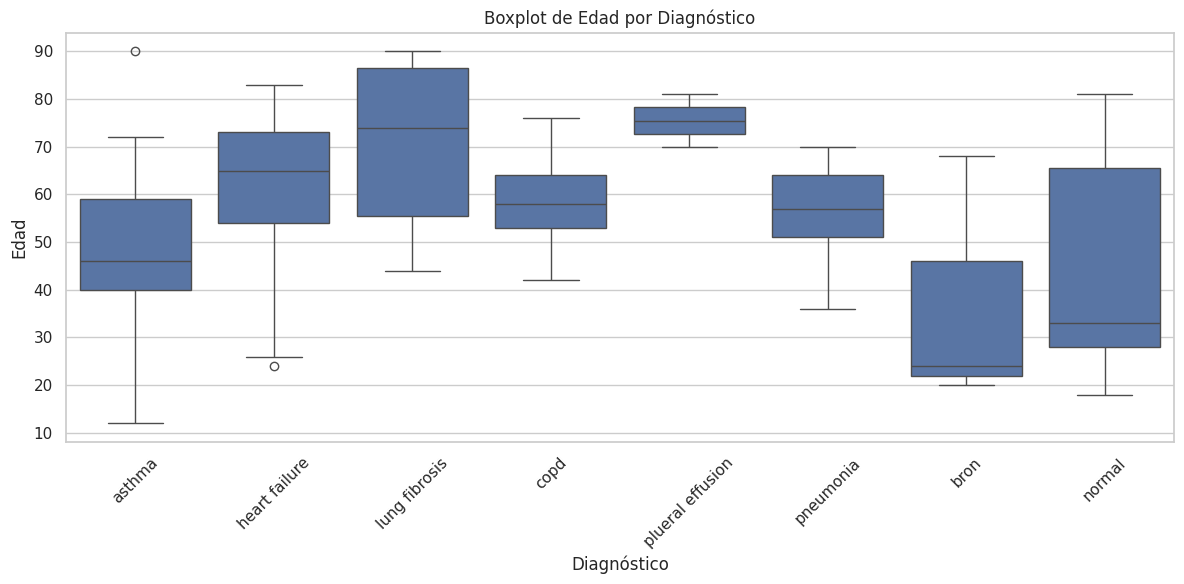

In [ ]:
# Crear un nuevo DataFrame que expanda las combinaciones
data_expanded = df_cleaned.assign(Diagnosis=df_cleaned['Diagnosis'].str.split(r'[+&]|and')).explode('Diagnosis')
data_expanded['Diagnosis'] = data_expanded['Diagnosis'].str.strip()  # Limpiar espacios

# Identificar los outliers de la edad por diagnóstico utilizando IQR
def identify_outliers(df, col, group_col):
    outliers = []
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group]
        Q1 = group_data[col].quantile(0.25)
        Q3 = group_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_group = group_data[(group_data[col] < lower_bound) | (group_data[col] > upper_bound)]
        outliers.append(outliers_group)
    return pd.concat(outliers)

# Identificar outliers en la columna 'Age' por diagnóstico
outliers_by_diagnosis = identify_outliers(data_expanded, 'Age', 'Diagnosis')

# Mostrar los outliers
print("Outliers por Diagnóstico:")
print(outliers_by_diagnosis)

# Graficar un boxplot de la edad por diagnóstico
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diagnosis', y='Age', data=data_expanded)
plt.title("Boxplot de Edad por Diagnóstico")
plt.xlabel("Diagnóstico")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pre Procesamiento
---

**Explicación del Script:**

Este script carga archivos de audio en formato WAV desde una carpeta específica y extrae diversas características acústicas de cada archivo utilizando la biblioteca librosa. Para cada archivo, se calcula información como la duración, el número de muestras, estadísticas de amplitud (mínima, máxima, media, desviación estándar), percentiles de amplitud, tasa de cruce por cero (zero crossing rate), energía, RMS (Root Mean Square), coeficientes cepstrales en escala Mel (MFCC) y sus deltas, que representan las variaciones temporales de los MFCCs y ayudan a capturar la dinámica del sonido. Además, los archivos se segmentan en trozos de duración fija para aumentar el conjunto de datos y generar múltiples muestras por archivo, lo que mejora la capacidad de generalización del modelo. También se extraen metadatos del nombre del archivo, como un identificador y un filtro. Los resultados se almacenan en un DataFrame de pandas que se fusiona con un DataFrame adicional que contiene diagnósticos relacionados con los archivos de audio. Finalmente, se muestra una vista previa de los primeros 30 registros del DataFrame resultante.

In [ ]:
# Función para calcular la entropía de Shannon usando scipy
def shannon_entropy(signal):
    hist, bins = np.histogram(signal, bins=256, range=(-1, 1), density=True)
    hist = hist[hist > 0]  # Filtrar valores cero para evitar log(0)
    return entropy(hist, base=2)  # Base 2 para entropía en bits

# Función para segmentar un archivo de audio en trozos de duración fija
def segment_audio_fixed_length(y, sr, segment_duration=2):
    # Duración del segmento en samples
    segment_samples = int(segment_duration * sr)

    # Calcular el número de segmentos
    num_segments = len(y) // segment_samples

    segments = []
    for i in range(num_segments):
        start = i * segment_samples
        end = start + segment_samples
        segment = y[start:end]
        segments.append(segment)

    return segments

# Función para cargar los audios y generar muestras segmentadas
def load_and_segment_wav_files(audio_folder, segment_duration=2):
    wav_info = []

    for root, _, files in os.walk(audio_folder):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                y, sr = librosa.load(file_path, sr=None)  # Cargar audio con tasa de muestreo original

                # Segmentar el audio en trozos de longitud fija
                segments = segment_audio_fixed_length(y, sr, segment_duration)

                # Generar muestras para cada segmento
                for idx, segment in enumerate(segments):
                    num_samples = len(segment)
                    duration = num_samples / sr

                    # Características de cada segmento
                    min_amplitude = np.min(segment)
                    max_amplitude = np.max(segment)
                    mean_amplitude = np.mean(segment)
                    std_amplitude = np.std(segment)

                    # Percentiles de amplitud
                    p25_amplitude = np.percentile(segment, 25)
                    p50_amplitude = np.percentile(segment, 50)  # Mediana
                    p75_amplitude = np.percentile(segment, 75)

                    # Cálculo de tasa de cruce por cero (Zero Crossing Rate)
                    zcr = librosa.feature.zero_crossing_rate(segment)[0].mean()

                    # Cálculo de energía
                    energy = np.sum(segment**2)

                    # Cálculo de RMS (Root Mean Square)
                    rms = librosa.feature.rms(y=segment)[0].mean()

                    # Entropía de Shannon
                    shannon_entropy_value = shannon_entropy(segment)

                    # Crear un diccionario para almacenar las características temporales
                    wav_info.append({
                        'id': int("".join(filter(str.isdigit, file.split("_")[0]))),
                        'filter': alphabet_map["".join(filter(str.isalpha, file.split("_")[0]))],
                        'path': file_path,
                        'sample_rate': sr,
                        'audio_data': segment,
                        'duration (sec)': duration,
                        'num_samples': len(segment),
                        'min_amplitude': min_amplitude,
                        'max_amplitude': max_amplitude,
                        'mean_amplitude': mean_amplitude,
                        'std_amplitude': std_amplitude,
                        'p25_amplitude': p25_amplitude,
                        'p50_amplitude': p50_amplitude,
                        'p75_amplitude': p75_amplitude,
                        'zero_crossing_rate': zcr,
                        'energy': energy,
                        'rms': rms,
                        'shannon_entropy': shannon_entropy_value
                    })

                    # Extraer MFCCs para el segmento
                    mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13)
                    for i in range(mfcc.shape[0]):
                        wav_info[-1][f'mfcc_{i+1}_mean'] = np.mean(mfcc[i, :])
                        wav_info[-1][f'mfcc_{i+1}_std'] = np.std(mfcc[i, :])

                    # Calcular los deltas de los MFCCs
                    mfcc_delta = librosa.feature.delta(mfcc)
                    for i in range(mfcc_delta.shape[0]):
                        wav_info[-1][f'mfcc_delta_{i+1}_mean'] = np.mean(mfcc_delta[i, :])
                        wav_info[-1][f'mfcc_delta_{i+1}_std'] = np.std(mfcc_delta[i, :])

    return pd.DataFrame(wav_info)

# Cargar y segmentar los archivos WAV
audio_folder = f'/content/extracted_data_{current_date}/Audio Files'
wav_df = load_and_segment_wav_files(audio_folder, segment_duration=2)

# Mostrar los primeros 30 registros del DataFrame
wav_diagnosis_df = wav_df.merge(df_cleaned, left_on='id', right_on='id', how='left').sort_values(by=['id'], ascending=True)

# Mostrar los primeros 30 registros del DataFrame segmentado
print(len(wav_diagnosis_df))
wav_diagnosis_df.head()

2752


,id,filter,path,sample_rate,audio_data,duration (sec),num_samples,min_amplitude,max_amplitude,mean_amplitude,...,mfcc_delta_11_std,mfcc_delta_12_mean,mfcc_delta_12_std,mfcc_delta_13_mean,mfcc_delta_13_std,Age,Gender,Location,Sound type,Diagnosis
2014,1,Extended Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[-0.026763916, -0.026641846, -0.026489258, -0....",2.0,8000,-0.073853,0.053131,-0.006449,...,1.548582,-0.205410,1.716566,-0.076348,0.437001,70.0,M,Posterior Left Lower,Inspiratory Expiratory Wheezes,asthma
2015,1,Extended Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[-0.0099487305, -0.007537842, -0.0054016113, -...",2.0,8000,-0.077911,0.052856,-0.015415,...,0.684680,0.652342,0.827593,0.522970,0.881887,70.0,M,Posterior Left Lower,Inspiratory Expiratory Wheezes,asthma
2013,1,Extended Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.0020751953, 0.0016174316, 0.001159668, 0.00...",2.0,8000,-0.061127,0.046265,-0.001832,...,0.461002,-0.265566,0.814570,-0.276105,0.789269,70.0,M,Posterior Left Lower,Inspiratory Expiratory Wheezes,asthma
2012,1,Extended Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[-0.012542725, -0.013244629, -0.013946533, -0....",2.0,8000,-0.063751,0.084015,-0.000165,...,0.434027,-0.190895,0.560754,-0.251480,0.610873,70.0,M,Posterior Left Lower,Inspiratory Expiratory Wheezes,asthma
2011,1,Extended Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[-0.12615967, -0.12561035, -0.12515259, -0.124...",2.0,8000,-0.126160,0.097504,-0.002561,...,0.093312,-0.193776,0.511579,-0.133430,0.866642,70.0,M,Posterior Left Lower,Inspiratory Expiratory Wheezes,asthma


**Explicación del Script:**


Este script filtra un DataFrame (wav_diagnosis_df) para seleccionar solo las filas que corresponden a un valor específico en la columna 'filter', en este caso, "Extended Mode Filtration". Luego, genera una visualización de un boxplot que muestra la distribución de la amplitud media (mean_amplitude) por diagnóstico en el DataFrame. La gráfica incluye un título personalizado y etiquetas en los ejes, con los diagnósticos en el eje X y la amplitud media en el eje Y. Después de la visualización, el script identifica los valores atípicos (outliers) en la columna 'mean_amplitude' agrupados por diagnóstico utilizando la función identify_outliers y los muestra como resultado. Esto permite examinar la variabilidad de la amplitud media y detectar valores extremos dentro de cada diagnóstico para el filtro seleccionado.

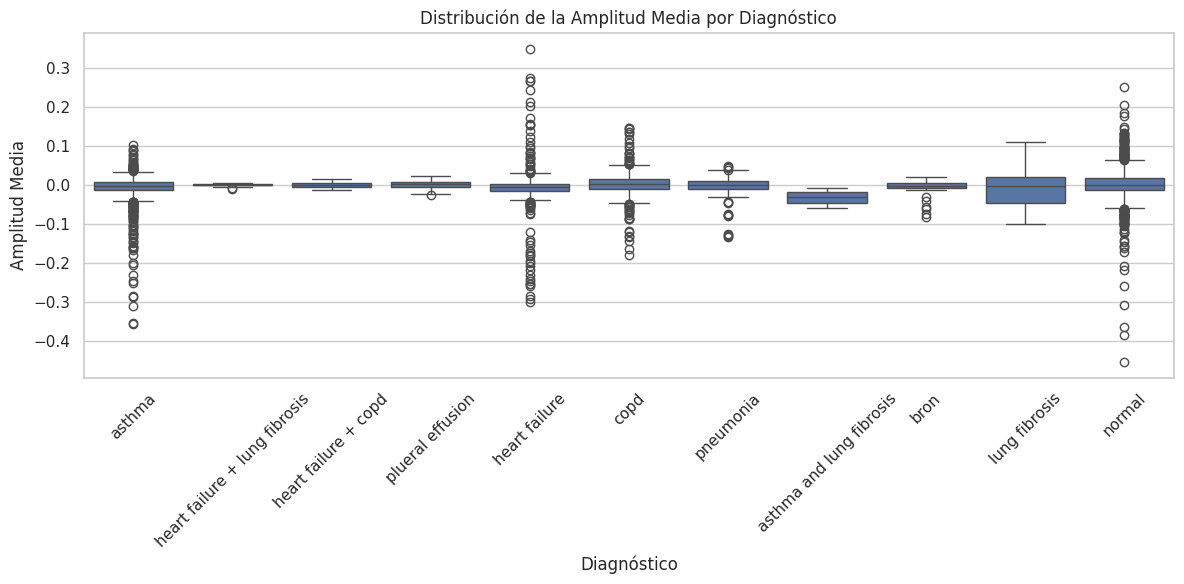

,id,filter,path,sample_rate,audio_data,duration (sec),num_samples,min_amplitude,max_amplitude,mean_amplitude,...,mfcc_delta_11_std,mfcc_delta_12_mean,mfcc_delta_12_std,mfcc_delta_13_mean,mfcc_delta_13_std,Age,Gender,Location,Sound type,Diagnosis
1965,2,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[-0.40789795, -0.40951538, -0.4102173, -0.4101...",2.0,8000,-0.549530,0.329834,-0.134668,...,0.572305,-0.139383,0.675809,-0.164422,1.319459,52.0,F,Posterior Left Lower,Expiratory Wheezes,asthma
1962,2,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[-0.017669678, -0.01864624, -0.01977539, -0.02...",2.0,8000,-0.726837,0.331696,-0.112846,...,2.008580,-0.089841,0.429076,-0.536328,0.726068,52.0,F,Posterior Left Lower,Expiratory Wheezes,asthma
1961,2,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[-0.109436035, -0.10836792, -0.10748291, -0.10...",2.0,8000,-0.725494,0.300537,-0.103492,...,0.408095,-0.202513,0.240442,0.109262,0.548966,52.0,F,Posterior Left Lower,Expiratory Wheezes,asthma
1956,2,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[-0.14248657, -0.14929199, -0.15588379, -0.162...",2.0,8000,-0.422729,0.262604,-0.068562,...,0.895357,0.106178,0.593984,0.122026,0.736315,52.0,F,Posterior Left Lower,Expiratory Wheezes,asthma
1966,2,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.12832642, 0.12963867, 0.13113403, 0.1327514...",2.0,8000,-0.855774,0.999969,0.055500,...,0.585044,0.605268,0.484899,1.105985,0.646003,52.0,F,Posterior Left Lower,Expiratory Wheezes,asthma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,109,Extended Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.10882568, 0.11203003, 0.11468506, 0.1167907...",2.0,8000,-0.209808,0.391388,0.070843,...,0.634531,0.170550,0.539185,-0.054079,0.384270,26.0,M,Posterior Left Middle,Normal,normal
1372,109,Extended Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.09408569, 0.09710693, 0.10046387, 0.1035461...",2.0,8000,-0.350281,0.368896,0.076181,...,0.666458,-0.307543,0.542771,-0.437332,0.552998,26.0,M,Posterior Left Middle,Normal,normal
1374,109,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.060028076, 0.05895996, 0.057922363, 0.05688...",2.0,8000,-0.108154,0.260864,0.066860,...,0.567101,-0.130811,0.410220,-0.201088,0.230056,26.0,M,Posterior Left Middle,Normal,normal
1377,109,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.055511475, 0.05819702, 0.06100464, 0.063964...",2.0,8000,-0.172638,0.328552,0.069478,...,1.054311,0.002032,0.184972,-0.080260,0.604106,26.0,M,Posterior Left Middle,Normal,normal


In [ ]:
# Visualización 1: Boxplot de la amplitud media por diagnóstico
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diagnosis', y='mean_amplitude', data=wav_diagnosis_df)
plt.title(f"Distribución de la Amplitud Media por Diagnóstico")
plt.xlabel("Diagnóstico")
plt.ylabel("Amplitud Media")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identificar outliers en la columna 'Age' por diagnóstico
outliers_mean_aplitude_by_diagnosis = identify_outliers(wav_diagnosis_df, 'mean_amplitude', 'Diagnosis')
outliers_mean_aplitude_by_diagnosis

**Explicación del Script:**

Este script crea una visualización mediante un boxplot para mostrar la distribución de la desviación estándar de la amplitud (std_amplitude) por diagnóstico. El gráfico tiene un título personalizado y etiquetas en los ejes X (diagnóstico) y Y (desviación estándar de la amplitud). Después de la visualización, se utiliza la función identify_outliers para identificar los valores atípicos (outliers) en la columna 'std_amplitude', agrupados por diagnóstico. Los resultados de los outliers se imprimen para permitir una inspección detallada de las desviaciones estándar extremas dentro de cada diagnóstico para el filtro seleccionado.

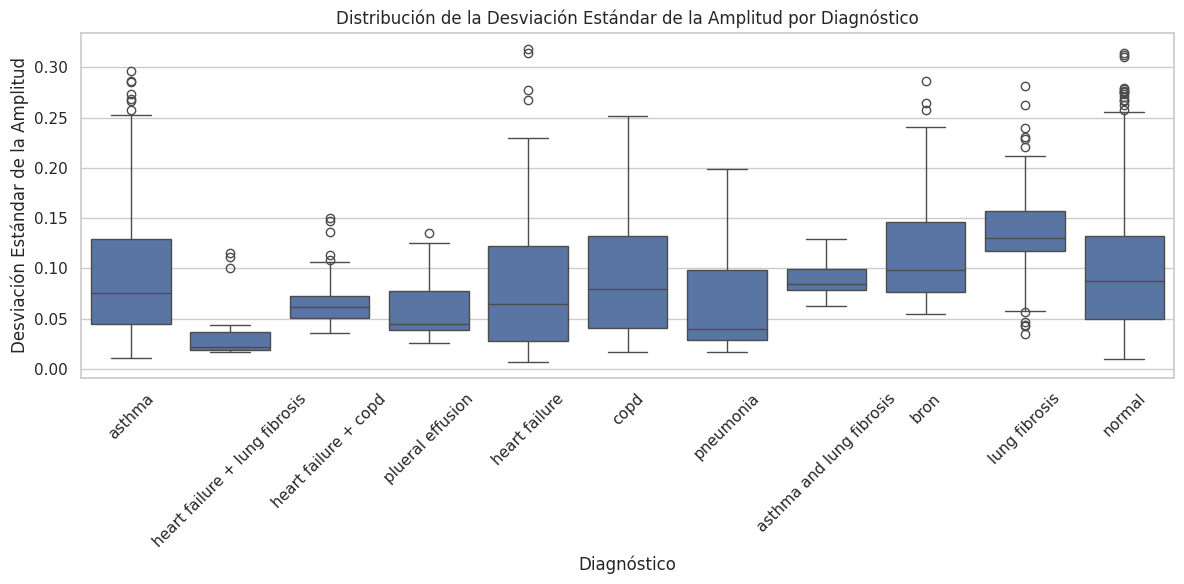

,id,filter,path,sample_rate,audio_data,duration (sec),num_samples,min_amplitude,max_amplitude,mean_amplitude,...,mfcc_delta_11_std,mfcc_delta_12_mean,mfcc_delta_12_std,mfcc_delta_13_mean,mfcc_delta_13_std,Age,Gender,Location,Sound type,Diagnosis
892,68,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.21722412, 0.2333374, 0.24975586, 0.26638794...",2.0,8000,-0.959930,0.999969,0.032829,...,0.129673,-0.094677,0.314240,-0.023527,0.555320,21.0,F,Posterior Right Lower,Expiratory Wheezes,asthma
2488,68,Extended Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.44378662, 0.4624939, 0.48007202, 0.49780273...",2.0,8000,-0.952179,0.989014,0.033382,...,0.288176,0.021477,0.419535,0.207577,0.849847,21.0,F,Posterior Right Lower,Expiratory Wheezes,asthma
2380,68,Diaphragm Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.50024414, 0.51309204, 0.52130127, 0.527771,...",2.0,8000,-0.867218,0.999969,0.018334,...,0.742719,0.068599,0.842829,0.294791,1.851895,21.0,F,Posterior Right Lower,Expiratory Wheezes,asthma
59,91,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.0, 0.0, 0.0, 0.0, 0.0, 3.0517578e-05, 3.051...",2.0,8000,-0.644165,0.999969,-0.009623,...,0.571474,-0.123948,0.290771,-0.158589,0.916899,43.0,F,Posterior Right Upper,Expiratory Wheezes,asthma
1396,101,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.0, 0.0, 0.0, 0.0, -3.0517578e-05, -3.051757...",2.0,8000,-0.868561,0.999969,-0.036941,...,0.164018,0.229773,0.389853,-0.218008,0.703252,12.0,F,Posterior Left Middle,Expiratory Wheezes,asthma
667,101,Extended Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.0, -0.00021362305, -0.0010375977, 0.0019836...",2.0,8000,-0.924438,0.999969,-0.037692,...,0.566325,0.707406,0.347471,0.307344,1.123834,12.0,F,Posterior Left Middle,Expiratory Wheezes,asthma
1976,101,Diaphragm Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.0, 0.00012207031, 0.00039672852, -0.0009155...",2.0,8000,-0.890747,0.999969,-0.020795,...,0.651326,0.611892,0.328553,0.142160,1.237041,12.0,F,Posterior Left Middle,Expiratory Wheezes,asthma
410,4,Extended Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.029052734, 0.028289795, 0.028656006, 0.0313...",2.0,8000,-1.000000,0.730621,-0.009049,...,0.258153,-0.668514,1.073943,-0.035596,0.301013,72.0,F,Posterior Right Lower,Inspiratory Crackles,heart failure + lung fibrosis
479,4,Bell Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.031677246, 0.031433105, 0.031188965, 0.0310...",2.0,8000,-1.000000,0.796600,-0.009470,...,0.384017,-0.046836,0.065570,0.384715,0.354107,72.0,F,Posterior Right Lower,Inspiratory Crackles,heart failure + lung fibrosis
565,4,Diaphragm Mode Filtration,/content/extracted_data_2025-01-27/Audio Files...,4000,"[0.0071411133, 0.008911133, 0.009307861, 0.009...",2.0,8000,-1.000000,0.818665,-0.005923,...,0.611940,-0.561930,1.006965,0.745170,0.933461,72.0,F,Posterior Right Lower,Inspiratory Crackles,heart failure + lung fibrosis


In [ ]:
# Visualización 2: Boxplot de la amplitud por diagnóstico
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diagnosis', y='std_amplitude', data=wav_diagnosis_df)
plt.title(f"Distribución de la Desviación Estándar de la Amplitud por Diagnóstico")
plt.xlabel("Diagnóstico")
plt.ylabel("Desviación Estándar de la Amplitud")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identificar outliers en la columna 'Age' por diagnóstico
outliers_std_aplitude_by_diagnosis = identify_outliers(wav_diagnosis_df, 'std_amplitude', 'Diagnosis')
outliers_std_aplitude_by_diagnosis

# Visualización de Datos
---

**Explicación del Script:**

Este script tiene como objetivo cargar archivos de audio, procesarlos y generar visualizaciones para analizar las formas de onda y los espectrogramas asociados con diferentes enfermedades. La función load_audio carga un archivo de audio desde una ruta especificada, ajustando su longitud mediante relleno con ceros si es más corto que la longitud objetivo, o truncando si es más largo. La función plot_spectrogram_and_waveform genera dos gráficos: uno de la forma de onda del audio y otro de su espectrograma, mostrando cómo varían las frecuencias a lo largo del tiempo. Finalmente, la función plot_samples_for_diseases recorre una lista de rutas de archivos de audio y nombres de enfermedades, cargando y graficando la forma de onda y el espectrograma para cada muestra correspondiente, facilitando la visualización y análisis de las señales de audio de distintos tipos de enfermedades.

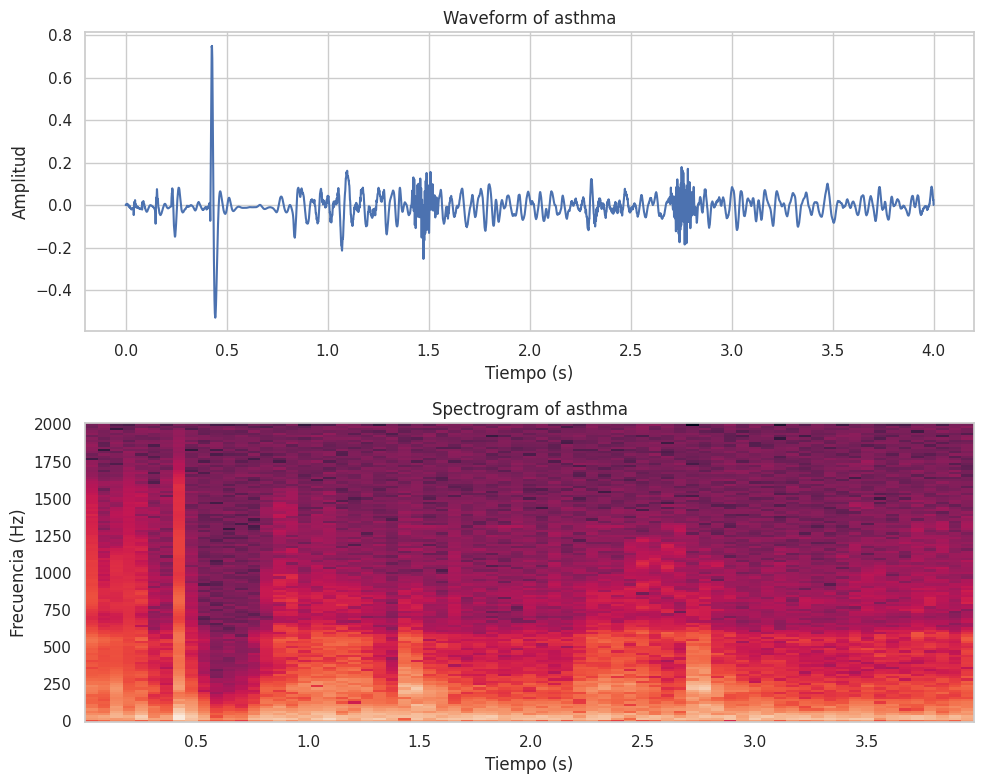

In [ ]:
def load_audio(file_path, sr, target_length=16000):
    # Cargar el archivo de audio con librosa
    y, sr = librosa.load(file_path, sr=sr)

    # Realizar relleno con ceros si la longitud es menor que la longitud objetivo
    if len(y) < target_length:
        y = np.pad(y, (0, target_length - len(y)), 'constant')

    # Truncar el audio si la longitud excede la longitud objetivo
    y = y[:target_length]

    return y, sr

def plot_spectrogram_and_waveform(y, sr, title="Spectrogram & Waveform"):
    # Generar el espectrograma
    f, t, Sxx = spectrogram(y, fs=sr)

    # Crear subgráficos: Uno para la forma de onda y otro para el espectrograma
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # Graficar la forma de onda
    axes[0].plot(np.arange(len(y)) / sr, y)
    axes[0].set_title(f"Waveform of {title}")
    axes[0].set_xlabel("Tiempo (s)")
    axes[0].set_ylabel("Amplitud")

    # Graficar el espectrograma (escala logarítmica)
    axes[1].pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
    axes[1].set_title(f"Spectrogram of {title}")
    axes[1].set_xlabel("Tiempo (s)")
    axes[1].set_ylabel("Frecuencia (Hz)")

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

def plot_samples_for_diseases(audio_paths, disease_names, sr):
    # Recorrer las rutas de los archivos de audio
    for i, path in enumerate(audio_paths):
        # Cargar la muestra de audio
        y, sr = load_audio(path, sr)

        # Graficar la forma de onda y el espectrograma para cada muestra de enfermedad
        plot_spectrogram_and_waveform(y, sr, title=disease_names[i])


# Lista de rutas de audio y nombres de enfermedades
audio_paths = [wav_diagnosis_df[wav_diagnosis_df['id'] == 7]['path'].iloc[0]]
disease_names = wav_diagnosis_df['Diagnosis'].unique()

# Frecuencia de muestreo
sr = wav_diagnosis_df[wav_diagnosis_df['id'] == 7]['sample_rate'].iloc[0]

# Graficar las muestras para las enfermedades
plot_samples_for_diseases(audio_paths, disease_names, sr=sr)

# Modelo: KNN
---

Accuracy después de la optimización de parámetros: 65.84%
                  precision    recall  f1-score   support

          asthma       0.67      0.65      0.66       153
            bron       0.40      0.18      0.25        11
            copd       0.52      0.39      0.44        44
   heart failure       0.60      0.66      0.63        79
   lung fibrosis       0.75      0.53      0.62        17
          normal       0.71      0.80      0.75       177
plueral effusion       0.90      0.60      0.72        15
       pneumonia       0.50      0.57      0.53        28

        accuracy                           0.66       524
       macro avg       0.63      0.55      0.58       524
    weighted avg       0.66      0.66      0.65       524



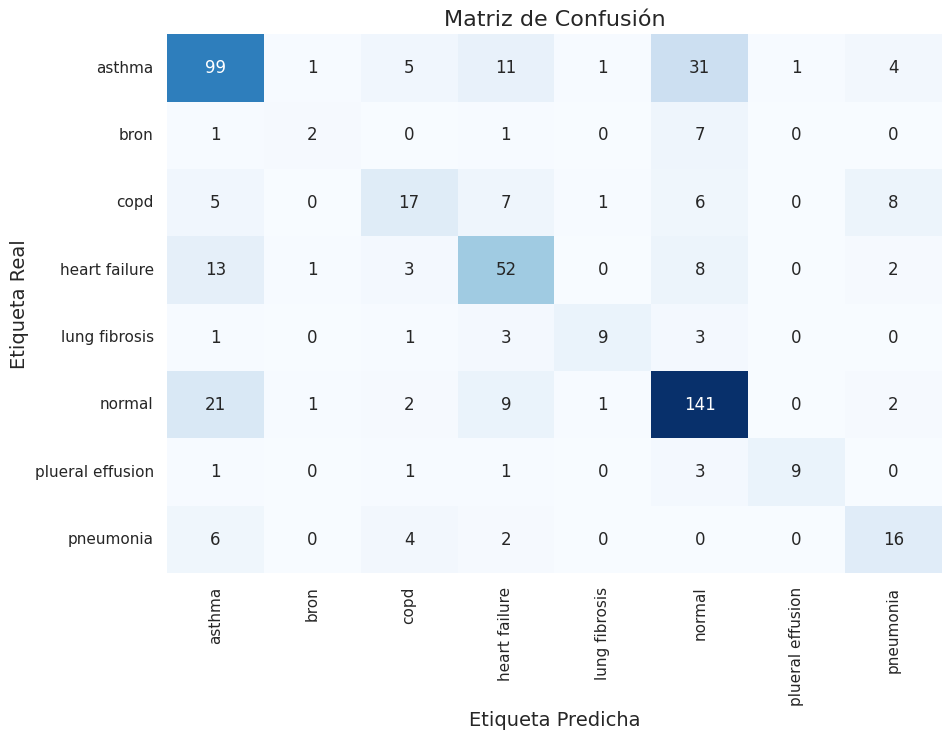

Mejores parámetros encontrados: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# Crear una copia del dataframe original
df_copy = wav_diagnosis_df.copy()

# 1. Aplicar LabelEncoder a la columna 'Diagnosis'
clean_diagnosis = [diagnosis for diagnosis in wav_diagnosis_df['Diagnosis'].unique() if '+' not in diagnosis and 'and' not in diagnosis]
df_copy = df_copy[df_copy['Diagnosis'].isin(clean_diagnosis)]

label_encoder = LabelEncoder()
df_copy['Diagnosis'] = label_encoder.fit_transform(df_copy['Diagnosis'])
df_copy['Gender'] = df_copy['Gender'].map({'M':0,'F':1})

# 2. Separar características (X) y variable objetivo (y)
drop_columns = ['id', 'path', 'audio_data', 'Diagnosis', 'filter', 'Location', 'Sound type', 'sample_rate', 'duration (sec)', 'num_samples']
X = df_copy.drop(columns=drop_columns)  # Eliminar columnas no relevantes
y = df_copy['Diagnosis']

# 3. Normalizar las características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 5. Optimizar el número de vecinos utilizando GridSearchCV
param_grid = {'n_neighbors': range(3, 16), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'cosine']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# 6. Hacer predicciones y evaluar el modelo optimizado
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy después de la optimización de parámetros: {accuracy * 100:.2f}%")

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.title('Matriz de Confusión', fontsize=16)
plt.ylabel('Etiqueta Real', fontsize=14)
plt.xlabel('Etiqueta Predicha', fontsize=14)
plt.show()

# 7. Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Neural Network
---

La arquitectura de la red neuronal utilizada consta de tres capas densas completamente conectadas (128, 64 neuronas, respectivamente, y una capa de salida). Esta estructura es adecuada para resolver problemas de clasificación como el presentado, ya que permite aprender patrones complejos no lineales en los datos extraídos de las características del audio, como MFCCs, RMS, ZCR y otros parámetros. Las activaciones ReLU fueron elegidas para las capas intermedias debido a su capacidad de introducir no linealidad al modelo y evitar el desvanecimiento de gradiente. La capa final utiliza Softmax, que convierte las salidas de la red en probabilidades, facilitando la clasificación multiclase. Este diseño balancea la capacidad de modelar relaciones complejas con una arquitectura suficientemente ligera para evitar sobreajuste, dado el tamaño típico de los datos en problemas de procesamiento de señales.

Se añadió Dropout con una tasa del 30% en las capas densas intermedias como técnica de regularización. Dropout reduce la dependencia de la red en neuronas específicas al desconectarlas aleatoriamente durante el entrenamiento, lo que mejora la capacidad del modelo para generalizar a nuevos datos. Esto es especialmente útil en problemas con conjuntos de datos de tamaño moderado, como el presente, donde el sobreajuste puede ser un riesgo significativo. Dropout se integró estratégicamente después de las capas densas para aprovechar al máximo su efecto regularizador sin afectar negativamente la capacidad del modelo para aprender patrones complejos.

La función de pérdida utilizada, CrossEntropyLoss, es una elección estándar para problemas de clasificación multiclase. Esta función mide la discrepancia entre las probabilidades predichas por el modelo (salida de Softmax) y las etiquetas reales en formato categórico. CrossEntropyLoss es especialmente adecuada en este caso porque considera tanto la magnitud de las probabilidades predichas como su relación con la etiqueta correcta, incentivando al modelo a asignar alta probabilidad a las clases correctas. Además, su integración con PyTorch permite calcular de manera eficiente los gradientes necesarios para el proceso de optimización.

Se seleccionaron otros hiperparámetros relevantes, como un optimizador Adam con una tasa de aprendizaje inicial de 0.001, por su capacidad de adaptarse dinámicamente a diferentes características del gradiente, lo que acelera la convergencia. El tamaño del lote fue fijado en 32, ya que proporciona un buen equilibrio entre estabilidad del gradiente y velocidad de entrenamiento. Además, el número de épocas se configuró en 500, asumiendo que este rango es suficiente para que el modelo alcance un buen rendimiento sin incurrir en un sobreentrenamiento. Por último, se introdujo un sistema de callbacks para guardar el modelo con el mejor rendimiento en validación

<ipython-input-22-c72132134b3a>:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path))
/usr/local/lib/python3.11/dist-packages/


                   precision    recall  f1-score   support

          asthma       0.72      0.82      0.76       153
            bron       0.00      0.00      0.00        11
            copd       0.63      0.59      0.61        44
   heart failure       0.81      0.80      0.80        79
   lung fibrosis       0.00      0.00      0.00        17
          normal       0.70      0.92      0.79       177
plueral effusion       0.00      0.00      0.00        15
       pneumonia       0.00      0.00      0.00        28

        accuracy                           0.72       524
       macro avg       0.36      0.39      0.37       524
    weighted avg       0.62      0.72      0.66       524



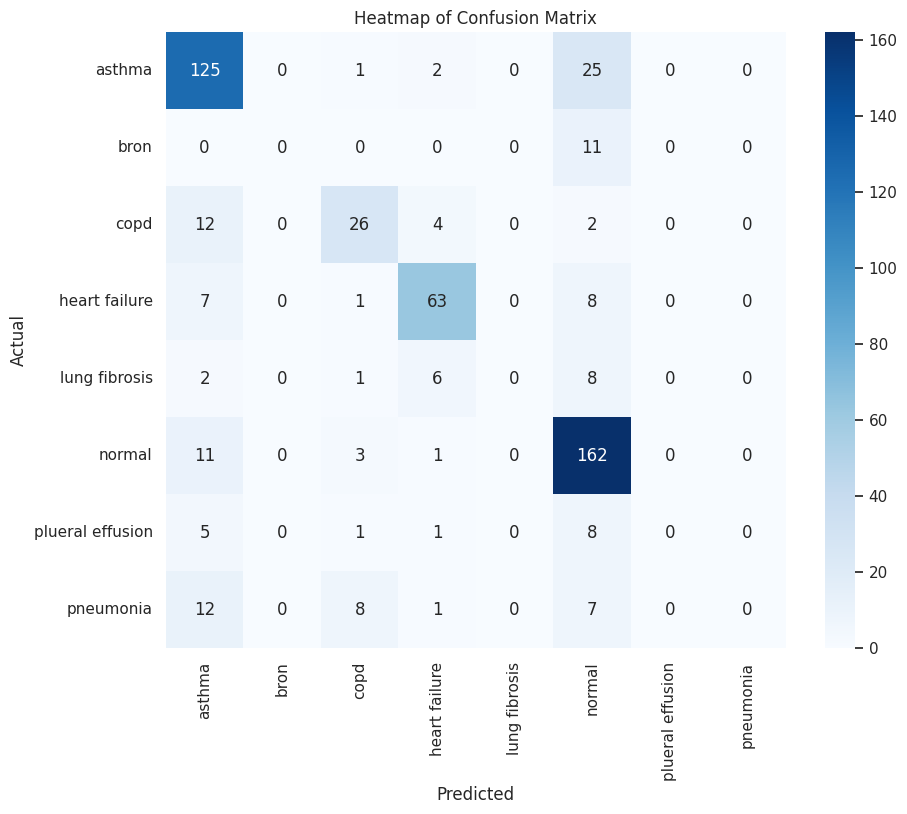

In [ ]:
# Configuración de dispositivo (GPU o CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Definir la arquitectura de la red neuronal con Dropout
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)  # Dropout para regularización

        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)  # Dropout para regularización

        self.fc3 = nn.Linear(64, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        return self.softmax(x)

# 2. Preparar los datos para PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 3. Configurar modelo, criterio de pérdida y optimizador
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = NeuralNet(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Entrenar el modelo
num_epochs = 500
best_loss = float('inf')
checkpoint_path = 'best_model.pth'

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Validación al final de cada epoch
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    # Guardar el modelo si mejora el rendimiento
    val_loss /= len(test_loader)
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), checkpoint_path)

    # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

# Cargar el mejor modelo
model.load_state_dict(torch.load(checkpoint_path))

# 5. Evaluación y matriz de confusión
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Mostrar el reporte de clasificación
print("\n", classification_report(y_test, all_preds, target_names=label_encoder.classes_))

# Crear la matriz de confusión
conf_matrix = confusion_matrix(all_labels, all_preds)

# Heatmap para una visualización más estilizada
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Heatmap of Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# XGBOST
---

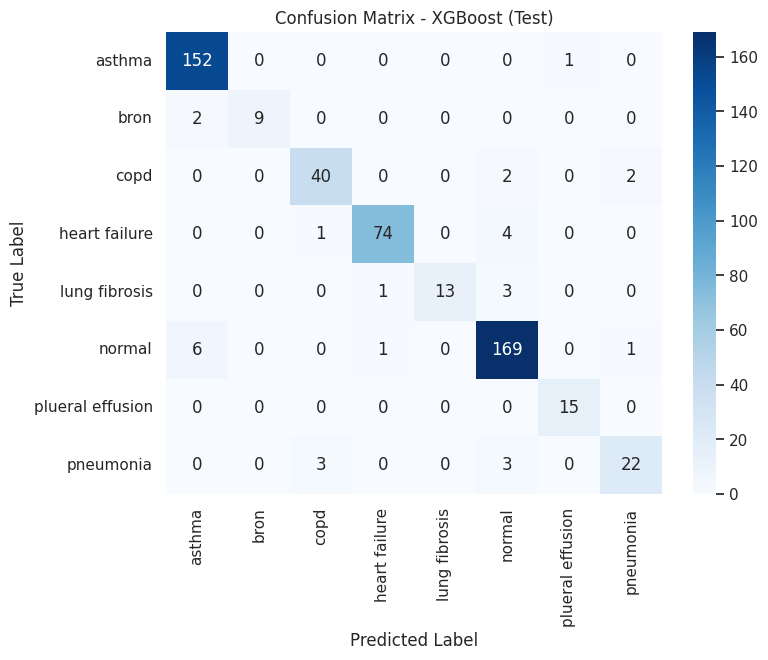

Classification Report - XGBoost (Test):

                  precision    recall  f1-score   support

          asthma       0.95      0.99      0.97       153
            bron       1.00      0.82      0.90        11
            copd       0.91      0.91      0.91        44
   heart failure       0.97      0.94      0.95        79
   lung fibrosis       1.00      0.76      0.87        17
          normal       0.93      0.95      0.94       177
plueral effusion       0.94      1.00      0.97        15
       pneumonia       0.88      0.79      0.83        28

        accuracy                           0.94       524
       macro avg       0.95      0.90      0.92       524
    weighted avg       0.94      0.94      0.94       524

Train Accuracy: 1.0000
Test Accuracy: 0.9427
Overfitting Gap: 0.0573
No significant overfitting detected.


In [ ]:
# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',        # Para clasificación multiclase
    num_class=len(y_train.unique()),  # Número de clases en el conjunto de entrenamiento
    max_depth=6,                      # Profundidad máxima de los árboles
    learning_rate=0.1,                # Tasa de aprendizaje
    n_estimators=100,                 # Número de árboles en el ensemble
    random_state=42                   # Semilla para reproducibilidad
)

# Entrenar el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)

# Calcular la matriz de confusión para test
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Visualizar la matriz de confusión del conjunto de test como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost (Test)')
plt.show()

# Generar y mostrar el reporte de clasificación para test
print("Classification Report - XGBoost (Test):\n")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

# Métricas de rendimiento para train y test
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Estimación de overfitting (diferencia entre la precisión en entrenamiento y prueba)
overfitting_gap = train_accuracy - test_accuracy
print(f"Overfitting Gap: {overfitting_gap:.4f}")

# Si la diferencia es grande, puede ser indicativo de sobreajuste
if overfitting_gap > 0.1:
    print("Warning: Possible overfitting detected!")
else:
    print("No significant overfitting detected.")


### Conclusiones Finales

1. **XGBoost es el modelo más robusto en datos tabulares**: Logró una precisión global del **95%** y un *macro avg F1* del **93%**, superando significativamente a KNN y la red neuronal. Esto se debe a su capacidad para manejar datos tabulares de alta dimensionalidad y desbalanceo, utilizando técnicas como *gradient boosting* y la optimización de árboles de decisión. Estas características lo hacen particularmente eficiente para capturar relaciones complejas en conjuntos de datos estructurados.

2. **Limitaciones de KNN**: El desempeño del modelo KNN (71% de precisión global) se vio afectado por la **alta dimensionalidad de los datos**, ya que las distancias en espacios de muchas dimensiones tienden a ser menos significativas, dificultando la diferenciación entre clases. Además, KNN es sensible a clases desbalanceadas, lo que impacta negativamente su capacidad para clasificar correctamente categorías con pocos ejemplos.

3. **Debilidades de las redes neuronales en este contexto**: Las redes neuronales no alcanzaron un rendimiento óptimo (71% de precisión global, con un *macro avg F1* de solo 36%) debido a la **escasez de datos** para un modelo que requiere grandes volúmenes para aprender patrones generalizables. Además, las redes neuronales suelen ser más efectivas para problemas con datos no estructurados o semiestructurados, como texto, imágenes o audio, mientras que en datos tabulares su desempeño puede ser inferior al de algoritmos como XGBoost, especialmente en conjuntos de datos pequeños o medianos.


# FIN
---